# Unsupervised ML (Clustering)

### Note: This phase requires your general knowledge and thought process to merge the right datasets and the right columns. Collecting quality data is a key factor to create meaningful clusters and Analysis.

Assumption: You were given various crime datasets that contains all the DISTRICTS in each state and you were asked to provide the below data to the higher authorities for further action.

#### 4.1  "Create 3 clusters as below.

1. Sensitive Area's

2. Moderate Area's

3. Peaceful Area's"

#### 4.2  Create DataFrame for each cluster that shows data according to the areas.

#### 4.3  "Analyse your clusters and prepare a report that explains all your observations.
Example - 

1. What is impacting more crimes in sensitive areas. 

2. What needs to be done to reduce crime. 

3. Most safe and unsafe districts.

4. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')


### Importing Datasets

In [2]:
df1=pd.read_csv(r"C:\Users\RANJAN\Downloads\India_Crime - Copy Capstone\01_District_wise_crimes_committed_IPC_2001_2012.csv")
df2=pd.read_csv(r"C:\Users\RANJAN\Downloads\India_Crime - Copy Capstone\02_01_District_wise_crimes_committed_against_SC_2001_2012.csv")
df3=pd.read_csv(r"C:\Users\RANJAN\Downloads\India_Crime - Copy Capstone\03_District_wise_crimes_committed_against_children_2001_2012.csv") 
df4=pd.read_csv(r"C:\Users\RANJAN\Downloads\India_Crime - Copy Capstone\42_District_wise_crimes_committed_against_women_2001_2012.csv")
df5=pd.read_csv(r"C:\Users\RANJAN\Downloads\India_Crime - Copy Capstone\02_District_wise_crimes_committed_against_ST_2001_2012.csv")

### Merging Datasets

In [3]:
df=pd.concat([df1,df2['Total crimes against SCs'],df3['Total crimes against children'],df4['Total crimes against women'],df5['Total crimes against STs']],axis=1)

### Exploratory Data Analysis(EDA)  ----->

In [4]:
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total crimes against SCs,Total crimes against children,Total crimes against women,Total crimes against STs
0,A & N ISLANDS,ANDAMAN,2001.0,13.0,0.0,0.0,3.0,0.0,3.0,2.0,...,1.0,9.0,0.0,0.0,310.0,637.0,0,0.0,33.0,0
1,A & N ISLANDS,NICOBAR,2001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,21.0,0,0.0,1.0,1
2,A & N ISLANDS,TOTAL,2001.0,13.0,0.0,0.0,3.0,0.0,3.0,2.0,...,1.0,9.0,0.0,0.0,323.0,658.0,0,0.0,34.0,1
3,A & N ISLANDS,ANDAMAN,2002.0,14.0,3.0,0.0,1.0,0.0,1.0,2.0,...,3.0,4.0,0.0,0.0,316.0,580.0,0,0.0,25.0,1
4,A & N ISLANDS,NICOBAR,2002.0,3.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,12.0,28.0,0,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,WEST BENGAL,SILIGURI G.R.P.,2012.0,4.0,1.0,0.0,0.0,0.0,0.0,3.0,...,1.0,0.0,0.0,0.0,58.0,248.0,0,102.0,13.0,0
9014,WEST BENGAL,SILIGURI_PC,2012.0,32.0,6.0,6.0,21.0,0.0,21.0,123.0,...,12.0,370.0,0.0,69.0,385.0,3023.0,0,1706.0,552.0,0
9015,WEST BENGAL,UTTAR DINAJPUR,2012.0,110.0,283.0,10.0,92.0,0.0,92.0,306.0,...,5.0,623.0,0.0,3.0,1839.0,5212.0,0,NaN,1137.0,8
9016,WEST BENGAL,TOTAL,2012.0,2252.0,2854.0,522.0,2046.0,0.0,2046.0,5117.0,...,556.0,19865.0,12.0,4385.0,64482.0,161427.0,1,NaN,30585.0,10


here we have merged all the dataset and have final dataset that has 9018 rows and 37 cloumns  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9018 entries, 0 to 9017
Data columns (total 37 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   STATE/UT                                             9017 non-null   object 
 1   DISTRICT                                             9017 non-null   object 
 2   YEAR                                                 9017 non-null   float64
 3   MURDER                                               9017 non-null   float64
 4   ATTEMPT TO MURDER                                    9017 non-null   float64
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   float64
 6   RAPE                                                 9017 non-null   float64
 7   CUSTODIAL RAPE                                       9017 non-null   float64
 8   OTHER RAPE                                           9017 non-null  

here we can see that our dataset contain two dtpyes i.e. object, int64 and float and there are  null values in our dataset. 

In [6]:
df = df.dropna()


In [7]:
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total crimes against SCs,Total crimes against children,Total crimes against women,Total crimes against STs
0,A & N ISLANDS,ANDAMAN,2001.0,13.0,0.0,0.0,3.0,0.0,3.0,2.0,...,1.0,9.0,0.0,0.0,310.0,637.0,0,0.0,33.0,0
1,A & N ISLANDS,NICOBAR,2001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,21.0,0,0.0,1.0,1
2,A & N ISLANDS,TOTAL,2001.0,13.0,0.0,0.0,3.0,0.0,3.0,2.0,...,1.0,9.0,0.0,0.0,323.0,658.0,0,0.0,34.0,1
3,A & N ISLANDS,ANDAMAN,2002.0,14.0,3.0,0.0,1.0,0.0,1.0,2.0,...,3.0,4.0,0.0,0.0,316.0,580.0,0,0.0,25.0,1
4,A & N ISLANDS,NICOBAR,2002.0,3.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,12.0,28.0,0,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,WEST BENGAL,PURAB MIDNAPUR,2012.0,82.0,5.0,15.0,65.0,0.0,65.0,196.0,...,0.0,572.0,0.0,743.0,2126.0,4981.0,2,0.0,857.0,4
9011,WEST BENGAL,PURULIA,2012.0,66.0,12.0,6.0,50.0,0.0,50.0,44.0,...,0.0,206.0,0.0,206.0,565.0,1841.0,16,0.0,366.0,0
9012,WEST BENGAL,SEALDAH G.R.P.,2012.0,19.0,9.0,2.0,0.0,0.0,0.0,7.0,...,2.0,0.0,0.0,0.0,39.0,657.0,1,44.0,22.0,1
9013,WEST BENGAL,SILIGURI G.R.P.,2012.0,4.0,1.0,0.0,0.0,0.0,0.0,3.0,...,1.0,0.0,0.0,0.0,58.0,248.0,0,102.0,13.0,0


We have addressed missing values in the dataset by removing the null values. Since only the last three rows out of a total of 9018 rows contain null values, the impact on the dataset is minimal. To further refine the data quality, we will now proceed to examine and handle any existing white spaces.

In [8]:
#  checking the values counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

UTTAR PRADESH        878
MADHYA PRADESH       628
MAHARASHTRA          552
BIHAR                540
TAMIL NADU           469
RAJASTHAN            454
ODISHA               430
KARNATAKA            399
GUJARAT              384
ANDHRA PRADESH       370
ASSAM                362
JAMMU & KASHMIR      322
PUNJAB               314
JHARKHAND            312
WEST BENGAL          307
HARYANA              268
CHHATTISGARH         266
KERALA               233
ARUNACHAL PRADESH    195
DELHI UT             183
HIMACHAL PRADESH     176
UTTARAKHAND          168
NAGALAND             138
MANIPUR              125
MIZORAM              108
MEGHALAYA             96
TRIPURA               67
SIKKIM                60
A & N ISLANDS         36
GOA                   36
DAMAN & DIU           36
PUDUCHERRY            31
CHANDIGARH            24
D & N HAVELI          24
LAKSHADWEEP           24
Name: STATE/UT, dtype: int64


TOTAL           407
G.R.P.           46
NORTH            37
SOUTH            37
WEST          

We have observed that there are no null values in the dataset now. However, we identified a redundancy in the 'DISTRICT' column where there are rows with 'total' and 'Delhi UT total' entries. These rows represent aggregated totals of the preceding columns and do not contribute to individual district-level information. Consequently, we will proceed to remove the rows containing 'total' and 'Delhi UT total' entries from the dataset for better data accuracy and relevance.

In [9]:
df = df[df['DISTRICT'] != 'TOTAL'].reset_index(drop=True)

In [10]:
df = df[df['DISTRICT'] != 'DELHI UT TOTAL'].reset_index(drop=True)

In [11]:
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total crimes against SCs,Total crimes against children,Total crimes against women,Total crimes against STs
0,A & N ISLANDS,ANDAMAN,2001.0,13.0,0.0,0.0,3.0,0.0,3.0,2.0,...,1.0,9.0,0.0,0.0,310.0,637.0,0,0.0,33.0,0
1,A & N ISLANDS,NICOBAR,2001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,21.0,0,0.0,1.0,1
2,A & N ISLANDS,ANDAMAN,2002.0,14.0,3.0,0.0,1.0,0.0,1.0,2.0,...,3.0,4.0,0.0,0.0,316.0,580.0,0,0.0,25.0,1
3,A & N ISLANDS,NICOBAR,2002.0,3.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,12.0,28.0,0,0.0,2.0,0
4,A & N ISLANDS,ANDAMAN,2003.0,16.0,4.0,1.0,2.0,0.0,2.0,2.0,...,2.0,7.0,0.0,0.0,299.0,611.0,0,6.0,22.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8591,WEST BENGAL,PURAB MIDNAPUR,2012.0,82.0,5.0,15.0,65.0,0.0,65.0,196.0,...,0.0,572.0,0.0,743.0,2126.0,4981.0,2,0.0,857.0,4
8592,WEST BENGAL,PURULIA,2012.0,66.0,12.0,6.0,50.0,0.0,50.0,44.0,...,0.0,206.0,0.0,206.0,565.0,1841.0,16,0.0,366.0,0
8593,WEST BENGAL,SEALDAH G.R.P.,2012.0,19.0,9.0,2.0,0.0,0.0,0.0,7.0,...,2.0,0.0,0.0,0.0,39.0,657.0,1,44.0,22.0,1
8594,WEST BENGAL,SILIGURI G.R.P.,2012.0,4.0,1.0,0.0,0.0,0.0,0.0,3.0,...,1.0,0.0,0.0,0.0,58.0,248.0,0,102.0,13.0,0


We are streamlining our dataset by removing certain columns such as 'INSULT TO MODESTY OF WOMEN,' 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,' 'CRUELTY BY HUSBAND OR HIS RELATIVES,' 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,' and 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY.' These columns collectively represent 'Total crimes against women,' and since we already have a dedicated column for this aggregate information in our dataset, we aim to enhance clarity and simplicity by excluding these specific crime type columns.

In [12]:
df.drop(['INSULT TO MODESTY OF WOMEN','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
    'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY','DOWRY DEATHS'],axis=1, inplace=True)

In [13]:
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total crimes against SCs,Total crimes against children,Total crimes against women,Total crimes against STs
0,A & N ISLANDS,ANDAMAN,2001.0,13.0,0.0,0.0,3.0,0.0,3.0,2.0,...,2.0,4.0,113.0,0.0,310.0,637.0,0,0.0,33.0,0
1,A & N ISLANDS,NICOBAR,2001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,13.0,21.0,0,0.0,1.0,1
2,A & N ISLANDS,ANDAMAN,2002.0,14.0,3.0,0.0,1.0,0.0,1.0,2.0,...,0.0,2.0,92.0,0.0,316.0,580.0,0,0.0,25.0,1
3,A & N ISLANDS,NICOBAR,2002.0,3.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,5.0,0.0,12.0,28.0,0,0.0,2.0,0
4,A & N ISLANDS,ANDAMAN,2003.0,16.0,4.0,1.0,2.0,0.0,2.0,2.0,...,0.0,7.0,107.0,0.0,299.0,611.0,0,6.0,22.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8591,WEST BENGAL,PURAB MIDNAPUR,2012.0,82.0,5.0,15.0,65.0,0.0,65.0,196.0,...,4.0,15.0,16.0,743.0,2126.0,4981.0,2,0.0,857.0,4
8592,WEST BENGAL,PURULIA,2012.0,66.0,12.0,6.0,50.0,0.0,50.0,44.0,...,0.0,2.0,162.0,206.0,565.0,1841.0,16,0.0,366.0,0
8593,WEST BENGAL,SEALDAH G.R.P.,2012.0,19.0,9.0,2.0,0.0,0.0,0.0,7.0,...,1.0,0.0,62.0,0.0,39.0,657.0,1,44.0,22.0,1
8594,WEST BENGAL,SILIGURI G.R.P.,2012.0,4.0,1.0,0.0,0.0,0.0,0.0,3.0,...,1.0,0.0,0.0,0.0,58.0,248.0,0,102.0,13.0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8596 entries, 0 to 8595
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   STATE/UT                                   8596 non-null   object 
 1   DISTRICT                                   8596 non-null   object 
 2   YEAR                                       8596 non-null   float64
 3   MURDER                                     8596 non-null   float64
 4   ATTEMPT TO MURDER                          8596 non-null   float64
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  8596 non-null   float64
 6   RAPE                                       8596 non-null   float64
 7   CUSTODIAL RAPE                             8596 non-null   float64
 8   OTHER RAPE                                 8596 non-null   float64
 9   KIDNAPPING & ABDUCTION                     8596 non-null   float64
 10  KIDNAPPING AND ABDUCTION

We have successfully completed the data preprocessing phase. Subsequently, we are prepared to execute the operations outlined in phase 4.

#### <span style="color:red"><u><b>4.1 "Create 3 clusters as below.</b></u></span>

1. Sensitive Area's
2. Moderate Area's
3. Peaceful Area's

#### <span style="color:red"><u><b>4.2 Create DataFrame for each cluster that shows data according to the areas.</b></u></span>

#### <span style="color:red"><u><b>4.3 "Analyse your clusters and prepare a report that explains all your observations.</b></u></span>

Example -

1. What is impacting more crimes in sensitive areas.

2. What needs to be done to reduce crime.

3. Most safe and unsafe districts.

4. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"


In [16]:
df_imp = df[['TOTAL IPC CRIMES', 'Total crimes against SCs', 'Total crimes against children', 'Total crimes against women',
             'Total crimes against STs']]


In [17]:
df_imp

,TOTAL IPC CRIMES,Total crimes against SCs,Total crimes against children,Total crimes against women,Total crimes against STs
0,637.0,0,0.0,33.0,0
1,21.0,0,0.0,1.0,1
2,580.0,0,0.0,25.0,1
3,28.0,0,0.0,2.0,0
4,611.0,0,6.0,22.0,1
...,...,...,...,...,...
8591,4981.0,2,0.0,857.0,4
8592,1841.0,16,0.0,366.0,0
8593,657.0,1,44.0,22.0,1
8594,248.0,0,102.0,13.0,0


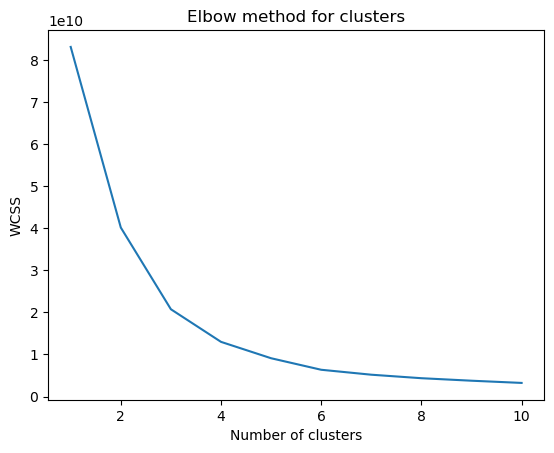

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=23)
    kmeans.fit(df_imp)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow method for clusters")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [24]:
df_imp.head()

,TOTAL IPC CRIMES,Total crimes against SCs,Total crimes against children,Total crimes against women,Total crimes against STs
0,637.0,0,0.0,33.0,0
1,21.0,0,0.0,1.0,1
2,580.0,0,0.0,25.0,1
3,28.0,0,0.0,2.0,0
4,611.0,0,6.0,22.0,1


We are in the process of creating three clusters from our dataset.

In [42]:
kmeans= KMeans(n_clusters=3,random_state = 23)
y_kmeans=kmeans.fit_predict(df_imp)
print(y_kmeans)

[0 0 0 ... 0 0 0]


In [30]:
# Just like in supervised learning we have a metric in unsupervised learning as well
from sklearn.metrics import silhouette_score

In [43]:
silhouette_score(df_imp,y_kmeans)

0.6122685391695629

The application of the KMeans clustering algorithm to our dataset resulted in a silhouette score of 0.6122685391695629. The silhouette score serves as a metric for gauging the clarity and distinctiveness of the clusters, with higher values indicative of well-defined groupings. In this particular context, the attained score of 0.6122685391695629 reflects a favorable clustering outcome. This suggests that the clusters exhibit internal cohesion among data points while also demonstrating clear separation from other clusters. Following this clustering analysis, we have classified the resultant clusters into three categories: 'Peaceful_area,' 'Moderate_area,' and 'Sensitive_area.' These designations aim to capture the nature or level of activity within each cluster, providing valuable insights into the underlying patterns within our dataset.

In [61]:
Peaceful_area = df[y_kmeans==0]
Peaceful_area

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total crimes against SCs,Total crimes against children,Total crimes against women,Total crimes against STs,Cluster
0,A & N ISLANDS,ANDAMAN,2001.0,13.0,0.0,0.0,3.0,0.0,3.0,2.0,...,4.0,113.0,0.0,310.0,637.0,0,0.0,33.0,0,0
1,A & N ISLANDS,NICOBAR,2001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,13.0,21.0,0,0.0,1.0,1,0
2,A & N ISLANDS,ANDAMAN,2002.0,14.0,3.0,0.0,1.0,0.0,1.0,2.0,...,2.0,92.0,0.0,316.0,580.0,0,0.0,25.0,1,0
3,A & N ISLANDS,NICOBAR,2002.0,3.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,5.0,0.0,12.0,28.0,0,0.0,2.0,0,0
4,A & N ISLANDS,ANDAMAN,2003.0,16.0,4.0,1.0,2.0,0.0,2.0,2.0,...,7.0,107.0,0.0,299.0,611.0,0,6.0,22.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8585,WEST BENGAL,KHARAGPUR G.R.P.,2012.0,6.0,0.0,0.0,2.0,0.0,2.0,4.0,...,0.0,3.0,0.0,21.0,199.0,0,31.0,12.0,2,0
8592,WEST BENGAL,PURULIA,2012.0,66.0,12.0,6.0,50.0,0.0,50.0,44.0,...,2.0,162.0,206.0,565.0,1841.0,16,0.0,366.0,0,0
8593,WEST BENGAL,SEALDAH G.R.P.,2012.0,19.0,9.0,2.0,0.0,0.0,0.0,7.0,...,0.0,62.0,0.0,39.0,657.0,1,44.0,22.0,1,0
8594,WEST BENGAL,SILIGURI G.R.P.,2012.0,4.0,1.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,58.0,248.0,0,102.0,13.0,0,0


In [45]:
Moderate_area = df[y_kmeans==1]
Moderate_area

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total crimes against SCs,Total crimes against children,Total crimes against women,Total crimes against STs
24,ANDHRA PRADESH,ADILABAD,2001.0,101.0,60.0,17.0,50.0,0.0,50.0,46.0,...,1.0,30.0,1131.0,181.0,1518.0,4154.0,55,0.0,454.0,18
25,ANDHRA PRADESH,ANANTAPUR,2001.0,151.0,125.0,1.0,23.0,0.0,23.0,53.0,...,8.0,69.0,1543.0,270.0,754.0,4125.0,127,66.0,356.0,14
26,ANDHRA PRADESH,CHITTOOR,2001.0,101.0,57.0,2.0,27.0,0.0,27.0,59.0,...,9.0,38.0,2088.0,404.0,1262.0,5818.0,114,0.0,456.0,2
28,ANDHRA PRADESH,EAST GODAVARI,2001.0,82.0,67.0,1.0,23.0,0.0,23.0,49.0,...,3.0,41.0,1244.0,431.0,2313.0,6507.0,89,0.0,475.0,14
30,ANDHRA PRADESH,GUNTUR,2001.0,182.0,88.0,2.0,54.0,0.0,54.0,82.0,...,8.0,43.0,1792.0,369.0,2426.0,7848.0,141,0.0,758.0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8581,WEST BENGAL,HOWRAH CITY,2012.0,39.0,3.0,9.0,28.0,0.0,28.0,191.0,...,6.0,4.0,36.0,21.0,2879.0,5675.0,0,122.0,998.0,0
8583,WEST BENGAL,JALPAIGURI,2012.0,117.0,156.0,27.0,163.0,0.0,163.0,334.0,...,5.0,21.0,220.0,314.0,2952.0,7861.0,0,0.0,2263.0,0
8587,WEST BENGAL,MALDA,2012.0,118.0,322.0,21.0,158.0,0.0,158.0,290.0,...,110.0,25.0,787.0,0.0,2290.0,5634.0,4,0.0,1191.0,1
8590,WEST BENGAL,PASCHIM MIDNAPUR,2012.0,88.0,86.0,27.0,64.0,0.0,64.0,115.0,...,8.0,41.0,210.0,2.0,2201.0,5000.0,0,0.0,1128.0,0


In [46]:
Sensitive_area = df[y_kmeans==2]
Sensitive_area

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total crimes against SCs,Total crimes against children,Total crimes against women,Total crimes against STs
31,ANDHRA PRADESH,HYDERABAD CITY,2001.0,111.0,113.0,7.0,37.0,0.0,37.0,80.0,...,24.0,0.0,3137.0,409.0,1512.0,11831.0,79,25.0,991.0,2
59,ANDHRA PRADESH,HYDERABAD CITY,2002.0,117.0,109.0,3.0,57.0,0.0,57.0,115.0,...,21.0,8.0,3714.0,440.0,1759.0,14413.0,77,23.0,993.0,8
88,ANDHRA PRADESH,HYDERABAD CITY,2003.0,124.0,132.0,5.0,57.0,0.0,57.0,155.0,...,21.0,68.0,4595.0,489.0,1980.0,20252.0,92,56.0,1706.0,6
117,ANDHRA PRADESH,HYDERABAD CITY,2004.0,121.0,135.0,1.0,56.0,0.0,56.0,136.0,...,19.0,37.0,4837.0,482.0,1932.0,18868.0,136,113.0,1641.0,4
142,ANDHRA PRADESH,CYBERABAD,2005.0,150.0,88.0,10.0,44.0,0.0,44.0,151.0,...,5.0,37.0,3033.0,898.0,2086.0,12079.0,159,12.0,1055.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8568,WEST BENGAL,24 PARGANAS NORTH,2012.0,140.0,108.0,80.0,118.0,0.0,118.0,497.0,...,9.0,19.0,79.0,10.0,6062.0,11765.0,59,8.0,2590.0,41
8569,WEST BENGAL,24 PARGANAS SOUTH,2012.0,224.0,8.0,28.0,244.0,0.0,244.0,419.0,...,6.0,15.0,234.0,70.0,7641.0,14370.0,4,6.0,2457.0,2
8586,WEST BENGAL,KOLKATA,2012.0,85.0,154.0,29.0,68.0,0.0,68.0,271.0,...,26.0,0.0,3518.0,507.0,10903.0,25370.0,0,402.0,2034.0,0
8588,WEST BENGAL,MURSHIDABAD,2012.0,174.0,395.0,30.0,257.0,0.0,257.0,579.0,...,110.0,50.0,3254.0,347.0,2489.0,12713.0,2,17.0,4206.0,2


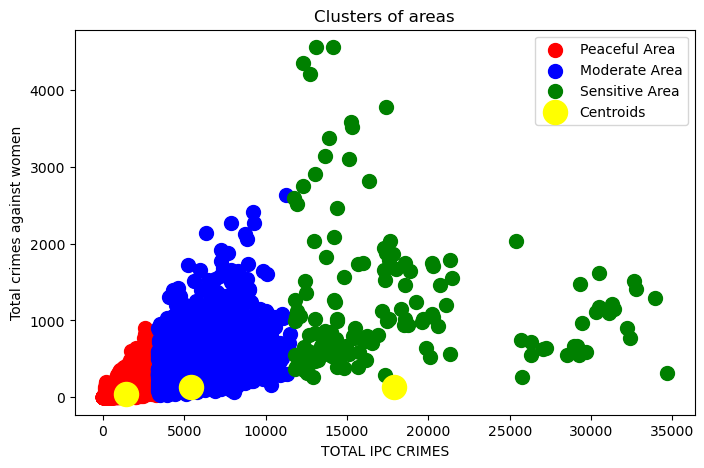

In [55]:
plt.figure(figsize=(8,5))
df['Cluster'] = kmeans.predict(df_imp)

plt.scatter(df[df['Cluster'] == 0]['TOTAL IPC CRIMES'], df[df['Cluster'] == 0]['Total crimes against women'], s=100, c='red', label='Peaceful Area')
plt.scatter(df[df['Cluster'] == 1]['TOTAL IPC CRIMES'], df[df['Cluster'] == 1]['Total crimes against women'], s=100, c='blue', label='Moderate Area')
plt.scatter(df[df['Cluster'] == 2]['TOTAL IPC CRIMES'], df[df['Cluster'] == 2]['Total crimes against women'], s=100, c='green', label='Sensitive Area')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of areas')
plt.xlabel('TOTAL IPC CRIMES')
plt.ylabel('Total crimes against women')
plt.legend()
plt.show()


- **Green Cluster (Cluster 3):** The dots in this cluster, represented by the color green, are notably distant. This suggests that cluster 3 is characterized by a higher count of crimes, particularly in the context of 'Total crimes against women.'

- **Red Cluster (Cluster 1):** The dots in the red cluster (Cluster 1) are situated near. This positioning indicates a moderate count of crimes within this cluster.

- **Blue Cluster (Cluster 2):** The dots in the blue cluster (Cluster 2) are also in close proximity. This suggests that Cluster 2 has a lower count of crimes, particularly in comparison to the other clusters, concerning 'Total crimes against women.'

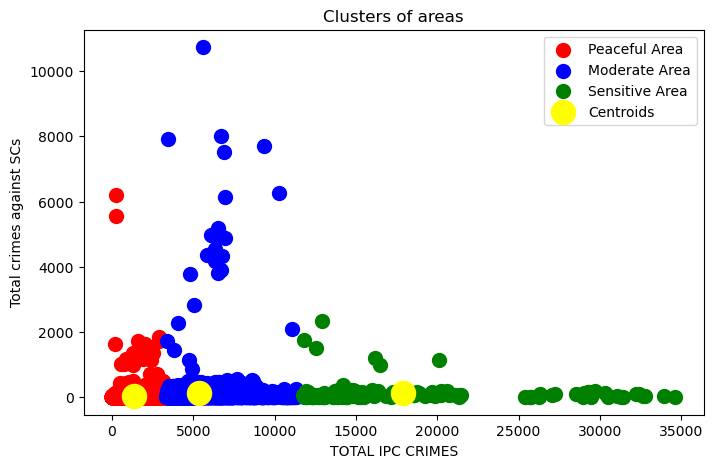

In [56]:
plt.figure(figsize=(8,5))
df['Cluster'] = kmeans.predict(df_imp)

plt.scatter(df[df['Cluster'] == 0]['TOTAL IPC CRIMES'], df[df['Cluster'] == 0]['Total crimes against SCs'], s=100, c='red', label='Peaceful Area')
plt.scatter(df[df['Cluster'] == 1]['TOTAL IPC CRIMES'], df[df['Cluster'] == 1]['Total crimes against SCs'], s=100, c='blue', label='Moderate Area')
plt.scatter(df[df['Cluster'] == 2]['TOTAL IPC CRIMES'], df[df['Cluster'] == 2]['Total crimes against SCs'], s=100, c='green', label='Sensitive Area')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of areas')
plt.xlabel('TOTAL IPC CRIMES')
plt.ylabel('Total crimes against SCs')
plt.legend()
plt.show()


- **Green Cluster (Cluster 3):** The dots in this cluster, represented by the color green, are notably distant. This suggests that cluster 3 is characterized by a higher count of crimes, particularly in the context of 'Total crimes against SCs.'

- **Red Cluster (Cluster 1):** The dots in the red cluster (Cluster 1) are situated near. This positioning indicates a moderate count of crimes within this cluster.

- **Blue Cluster (Cluster 2):** The dots in the blue cluster (Cluster 2) are also in close proximity. This suggests that Cluster 2 has a lower count of crimes, particularly in comparison to the other clusters, concerning 'Total crimes against SCs.'

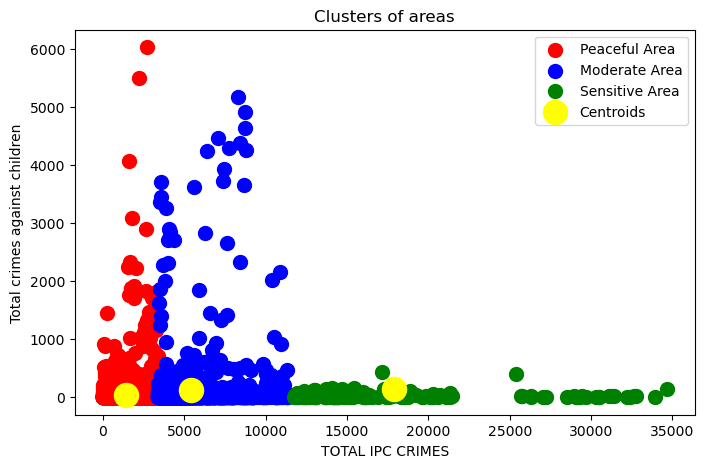

In [57]:
plt.figure(figsize=(8,5))
df['Cluster'] = kmeans.predict(df_imp)

plt.scatter(df[df['Cluster'] == 0]['TOTAL IPC CRIMES'], df[df['Cluster'] == 0]['Total crimes against children'], s=100, c='red', label='Peaceful Area')
plt.scatter(df[df['Cluster'] == 1]['TOTAL IPC CRIMES'], df[df['Cluster'] == 1]['Total crimes against children'], s=100, c='blue', label='Moderate Area')
plt.scatter(df[df['Cluster'] == 2]['TOTAL IPC CRIMES'], df[df['Cluster'] == 2]['Total crimes against children'], s=100, c='green', label='Sensitive Area')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of areas')
plt.xlabel('TOTAL IPC CRIMES')
plt.ylabel('Total crimes against children')
plt.legend()
plt.show()


- **Green Cluster (Cluster 3):** The dots in this cluster, represented by the color green, are notably distant. This suggests that cluster 3 is characterized by a higher count of crimes, particularly in the context of 'Total crimes against children.'

- **Red Cluster (Cluster 1):** The dots in the red cluster (Cluster 1) are situated near. This positioning indicates a moderate count of crimes within this cluster.

- **Blue Cluster (Cluster 2):** The dots in the blue cluster (Cluster 2) are also in close proximity. This suggests that Cluster 2 has a lower count of crimes, particularly in comparison to the other clusters, concerning 'Total crimes against children.'

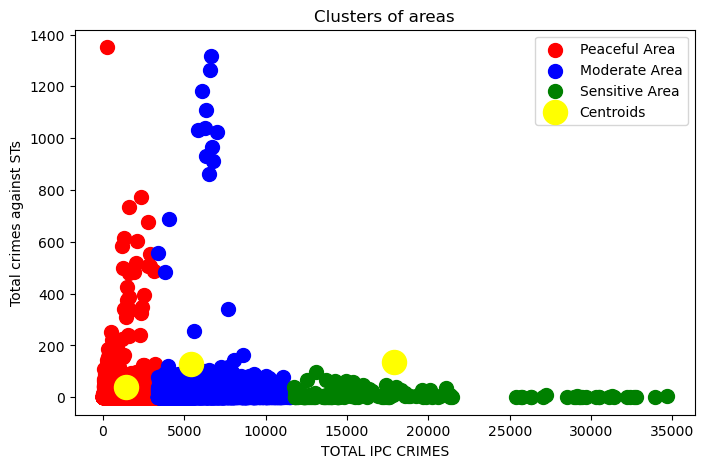

In [58]:
plt.figure(figsize=(8,5))
df['Cluster'] = kmeans.predict(df_imp)

plt.scatter(df[df['Cluster'] == 0]['TOTAL IPC CRIMES'], df[df['Cluster'] == 0]['Total crimes against STs'], s=100, c='red', label='Peaceful Area')
plt.scatter(df[df['Cluster'] == 1]['TOTAL IPC CRIMES'], df[df['Cluster'] == 1]['Total crimes against STs'], s=100, c='blue', label='Moderate Area')
plt.scatter(df[df['Cluster'] == 2]['TOTAL IPC CRIMES'], df[df['Cluster'] == 2]['Total crimes against STs'], s=100, c='green', label='Sensitive Area')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of areas')
plt.xlabel('TOTAL IPC CRIMES')
plt.ylabel('Total crimes against STs')
plt.legend()
plt.show()


- **Green Cluster (Cluster 3):** The dots in this cluster, represented by the color green, are notably distant. This suggests that cluster 3 is characterized by a higher count of crimes, particularly in the context of 'Total crimes against STs.'

- **Red Cluster (Cluster 1):** The dots in the red cluster (Cluster 1) are situated near. This positioning indicates a moderate count of crimes within this cluster.

- **Blue Cluster (Cluster 2):** The dots in the blue cluster (Cluster 2) are also in close proximity. This suggests that Cluster 2 has a lower count of crimes, particularly in comparison to the other clusters, concerning 'Total crimes against STs.'

## Top SAFE DISTRICTS 

In [98]:
top_safest_districts = Peaceful_area.groupby(['STATE/UT', 'DISTRICT']).agg({
    'TOTAL IPC CRIMES': 'sum',
    'Total crimes against SCs': 'sum',
    'Total crimes against children': 'sum',
    'Total crimes against women': 'sum',
    'Total crimes against STs': 'sum'
}).reset_index()
top_safest_districts['Overall Safety Score'] = top_safest_districts[['TOTAL IPC CRIMES', 'Total crimes against SCs', 'Total crimes against children', 'Total crimes against women', 'Total crimes against STs']].sum(axis=1)
top_safest_districts = top_safest_districts.sort_values(by='Overall Safety Score', ascending=True).head(20)
top_safest_districts


,STATE/UT,DISTRICT,TOTAL IPC CRIMES,Total crimes against SCs,Total crimes against children,Total crimes against women,Total crimes against STs,Overall Safety Score
242,JAMMU & KASHMIR,RAILWAYS KATRA,2.0,0,10.0,0.0,0,12.0
243,JAMMU & KASHMIR,RAILWAYS KMR,10.0,0,0.0,2.0,0,12.0
379,MANIPUR,CID,9.0,0,12.0,0.0,0,21.0
2,A & N ISLANDS,CAR,24.0,0,2.0,2.0,0,28.0
240,JAMMU & KASHMIR,RAILWAYS JAMMU,29.0,0,0.0,1.0,0,30.0
40,ASSAM,BIEO,16.0,0,14.0,0.0,0,30.0
225,JAMMU & KASHMIR,CRIME KASHMIR,32.0,0,0.0,0.0,0,32.0
545,TRIPURA,GRP,21.0,10,15.0,0.0,1,47.0
241,JAMMU & KASHMIR,RAILWAYS KASHMIR,43.0,0,6.0,2.0,0,51.0
543,TRIPURA,G.R.P.,6.0,0,65.0,1.0,0,72.0


## Top UNSAFE DISTRICTS 

In [93]:
top_unsafe_districts = Sensitive_area.groupby(['STATE/UT', 'DISTRICT']).agg({
    'TOTAL IPC CRIMES': 'sum',
    'Total crimes against SCs': 'sum',
    'Total crimes against children': 'sum',
    'Total crimes against women': 'sum',
    'Total crimes against STs': 'sum'
}).reset_index()
top_unsafe_districts['Overall Safety Score'] = top_unsafe_districts[['TOTAL IPC CRIMES', 'Total crimes against SCs', 'Total crimes against children', 'Total crimes against women', 'Total crimes against STs']].sum(axis=1)
top_unsafe_districts = top_unsafe_districts.sort_values(by='Overall Safety Score', ascending=False).head(20)
top_unsafe_districts


,STATE/UT,DISTRICT,TOTAL IPC CRIMES,Total crimes against SCs,Total crimes against children,Total crimes against women,Total crimes against STs,Overall Safety Score
4,KARNATAKA,BANGALORE COMMR.,350347.0,1423,26.0,9010.0,16,360822.0
3,GUJARAT,AHMEDABAD COMMR.,218005.0,823,418.0,14973.0,35,234254.0
16,MAHARASHTRA,MUMBAI COMMR.,222670.0,186,99.0,9304.0,11,232270.0
1,ANDHRA PRADESH,HYDERABAD CITY,202931.0,1293,872.0,19685.0,76,224857.0
14,MADHYA PRADESH,INDORE,204398.0,1139,3.0,10392.0,421,216353.0
13,MADHYA PRADESH,BHOPAL,158725.0,1459,1125.0,6618.0,208,168135.0
15,MAHARASHTRA,MUMBAI,141815.0,67,99.0,4251.0,2,146234.0
0,ANDHRA PRADESH,CYBERABAD,121527.0,1495,294.0,13715.0,274,137305.0
21,TAMIL NADU,CHENNAI,118295.0,5156,65.0,3759.0,81,127356.0
2,BIHAR,PATNA,109340.0,1359,164.0,4609.0,31,115503.0


## Top Safe STATES

In [84]:
safe_states = Peaceful_area.groupby('STATE/UT').agg({
    'TOTAL IPC CRIMES': 'sum',
    'Total crimes against SCs': 'sum',
    'Total crimes against children': 'sum',
    'Total crimes against women': 'sum',
    'Total crimes against STs': 'sum'
}).reset_index()
safe_states['Overall Safety Score'] = safe_states[['TOTAL IPC CRIMES', 'Total crimes against SCs', 'Total crimes against children', 'Total crimes against women', 'Total crimes against STs']].sum(axis=1)
top_safe_states = safe_states.sort_values(by='Overall Safety Score', ascending=True).head(5)
top_safe_states


,STATE/UT,TOTAL IPC CRIMES,Total crimes against SCs,Total crimes against children,Total crimes against women,Total crimes against STs,Overall Safety Score
18,LAKSHADWEEP,743.0,1,16.0,20.0,1,781.0
8,DAMAN & DIU,2948.0,5,988.0,90.0,5,4036.0
7,D & N HAVELI,4651.0,7,103.0,243.0,73,5077.0
26,PUDUCHERRY,8464.0,164,158.0,236.0,0,9022.0
0,A & N ISLANDS,9102.0,0,245.0,570.0,41,9958.0


## Top UNSafe STATES

In [85]:
unsafe_states = Sensitive_area.groupby('STATE/UT').agg({
    'TOTAL IPC CRIMES': 'sum',
    'Total crimes against SCs': 'sum',
    'Total crimes against children': 'sum',
    'Total crimes against women': 'sum',
    'Total crimes against STs': 'sum'
}).reset_index()
unsafe_states['Overall Unsafety Score'] = unsafe_states[['TOTAL IPC CRIMES', 'Total crimes against SCs', 'Total crimes against children', 'Total crimes against women', 'Total crimes against STs']].sum(axis=1)
top_unsafe_states = unsafe_states.sort_values(by='Overall Unsafety Score', ascending=False).head(5)
top_unsafe_states


,STATE/UT,TOTAL IPC CRIMES,Total crimes against SCs,Total crimes against children,Total crimes against women,Total crimes against STs,Overall Unsafety Score
6,MAHARASHTRA,455967.0,377,347.0,17655.0,16,474362.0
5,MADHYA PRADESH,363123.0,2598,1128.0,17010.0,629,384488.0
10,WEST BENGAL,315912.0,192,1085.0,59683.0,156,377028.0
0,ANDHRA PRADESH,324458.0,2788,1166.0,33400.0,350,362162.0
3,KARNATAKA,350347.0,1423,26.0,9010.0,16,360822.0


## <u>Distribution of Crime Types in Peaceful Areas

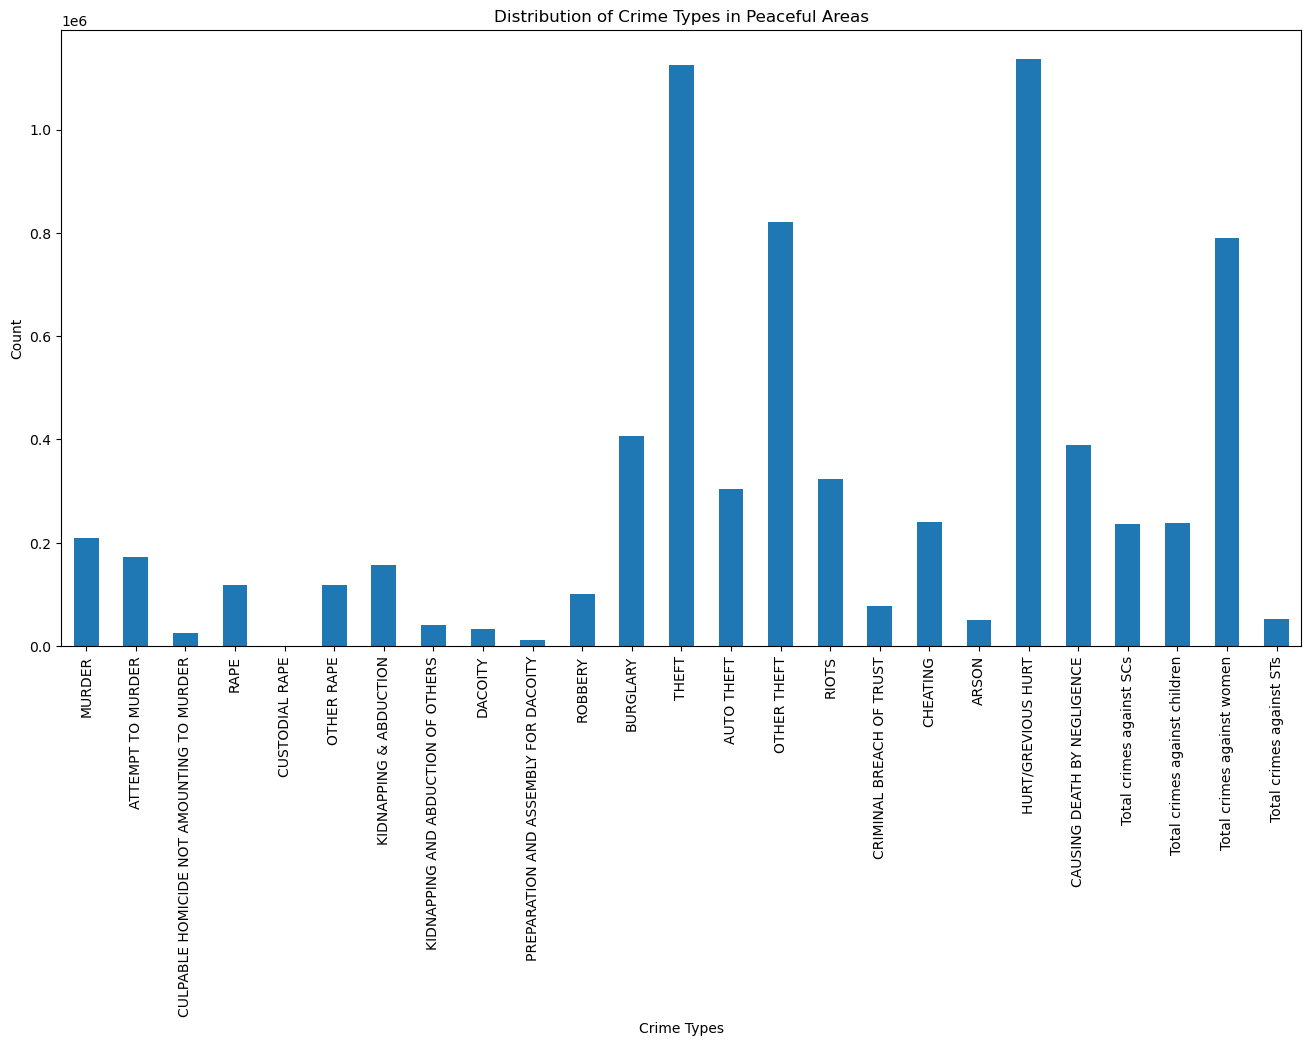

In [128]:
import matplotlib.pyplot as plt
crime_types = ['MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE', 'OTHER RAPE',
               'KIDNAPPING & ABDUCTION', 'KIDNAPPING AND ABDUCTION OF OTHERS',
               'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT', 'AUTO THEFT', 'OTHER THEFT',
               'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING', 'ARSON', 'HURT/GREVIOUS HURT', 'CAUSING DEATH BY NEGLIGENCE',
               'Total crimes against SCs', 'Total crimes against children', 'Total crimes against women',
               'Total crimes against STs']
crime_data_peaceful = Peaceful_area[crime_types]
crime_data_peaceful.sum().plot(kind='bar', figsize=(16, 8))
plt.title('Distribution of Crime Types in Peaceful Areas')
plt.xlabel('Crime Types')
plt.ylabel('Count')
plt.show()


In peaceful areas, there is an observed prevalence of higher occurrences in crimes related to theft, other theft, hurt/grievous hurt, and total crimes against women.

## <u>Distribution of Crime Types in Moderate Areas

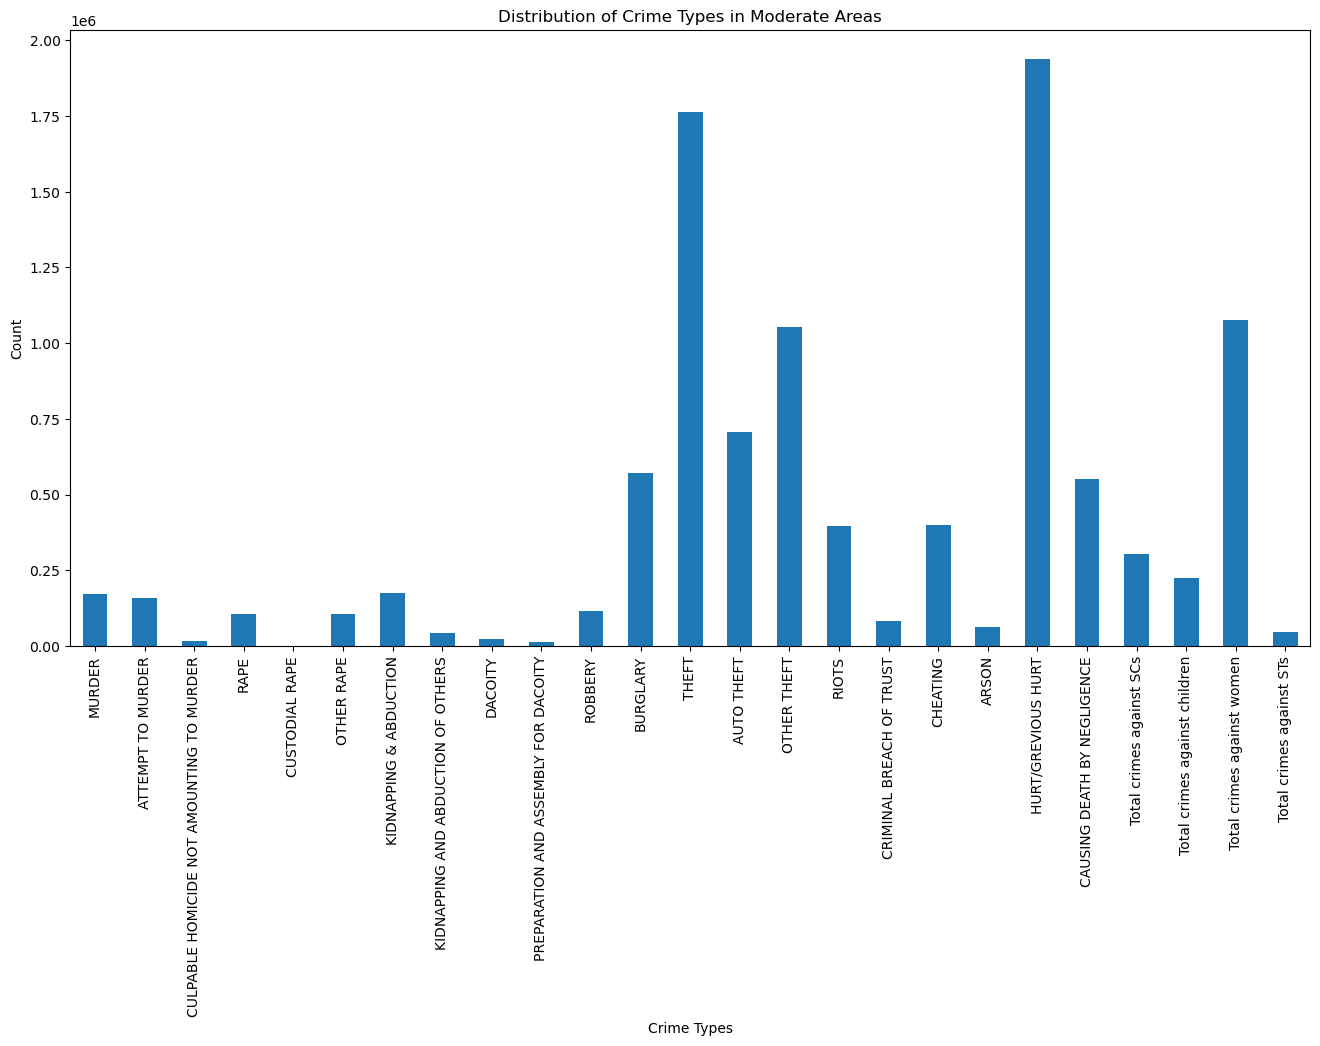

In [127]:
import matplotlib.pyplot as plt
crime_types = ['MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE', 'OTHER RAPE',
               'KIDNAPPING & ABDUCTION', 'KIDNAPPING AND ABDUCTION OF OTHERS',
               'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT', 'AUTO THEFT', 'OTHER THEFT',
               'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING', 'ARSON', 'HURT/GREVIOUS HURT', 'CAUSING DEATH BY NEGLIGENCE',
               'Total crimes against SCs', 'Total crimes against children', 'Total crimes against women',
               'Total crimes against STs']
crime_data_moderate = Moderate_area[crime_types]
crime_data_moderate.sum().plot(kind='bar', figsize=(16, 8))
plt.title('Distribution of Crime Types in Moderate Areas')
plt.xlabel('Crime Types')
plt.ylabel('Count')
plt.show()


In moderate areas, there is an observed prevalence of higher occurrences in crimes related to theft, other theft, hurt/grievous hurt, and total crimes against women.

## <u>Distribution of Crime Types in Sensitive Areas

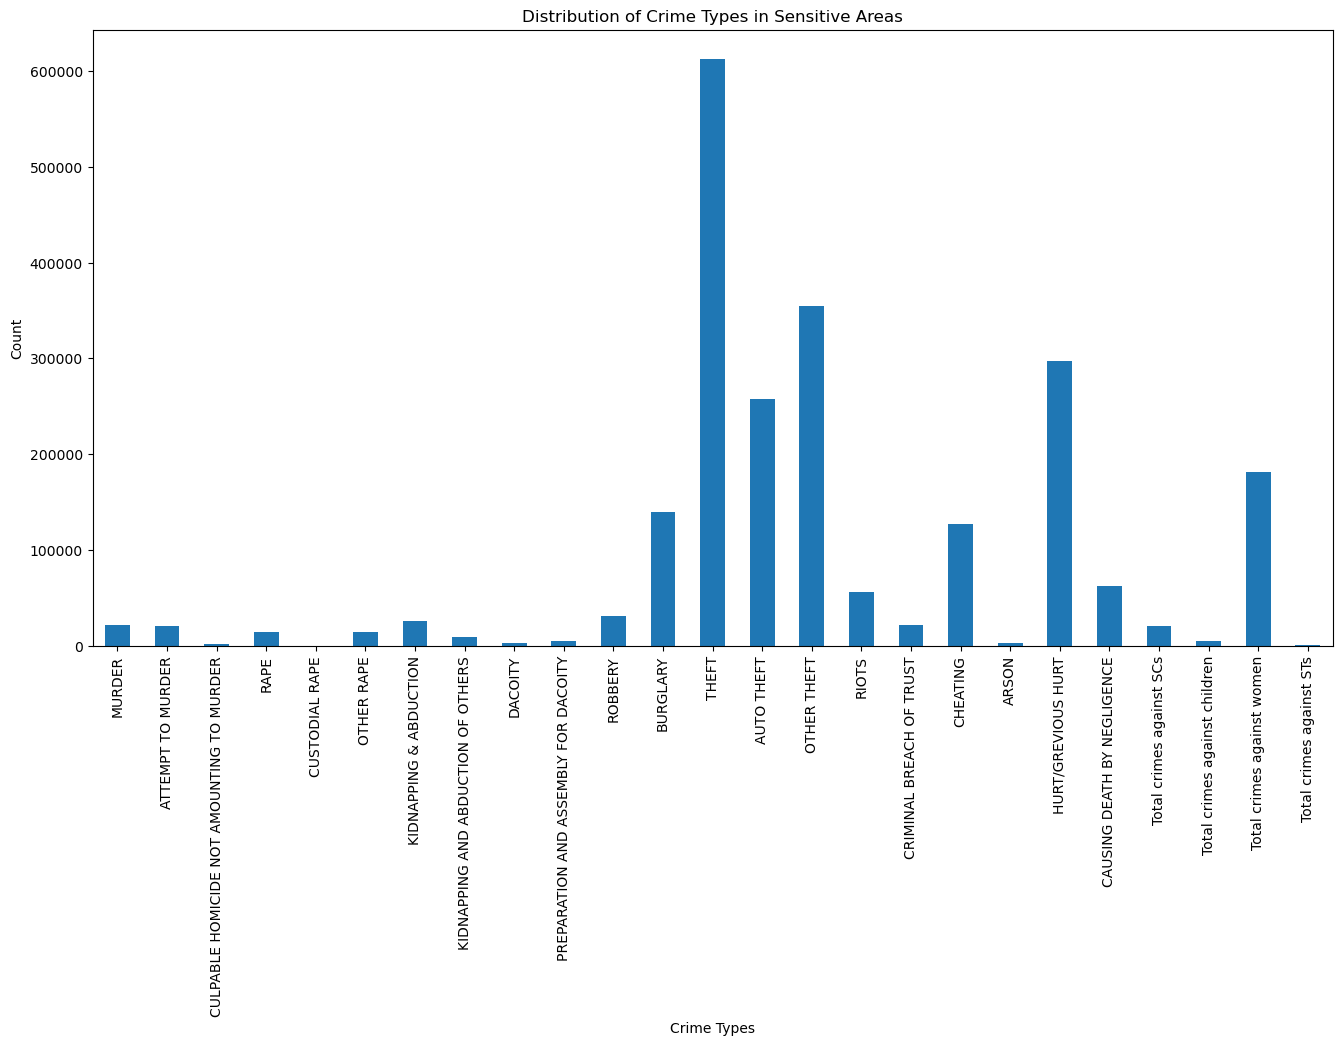

In [126]:
import matplotlib.pyplot as plt
crime_types = ['MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE', 'OTHER RAPE',
               'KIDNAPPING & ABDUCTION', 'KIDNAPPING AND ABDUCTION OF OTHERS',
               'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT', 'AUTO THEFT', 'OTHER THEFT',
               'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING', 'ARSON', 'HURT/GREVIOUS HURT', 'CAUSING DEATH BY NEGLIGENCE',
                'Total crimes against SCs', 'Total crimes against children', 'Total crimes against women',
               'Total crimes against STs']
crime_data_sensitive = Sensitive_area[crime_types]
crime_data_sensitive.sum().plot(kind='bar', figsize=(16, 8))
plt.title('Distribution of Crime Types in Sensitive Areas')
plt.xlabel('Crime Types')
plt.ylabel('Count')
plt.show()


In sensitive areas, there is an observed prevalence of higher occurrences in crimes related to theft, other theft, and hurt/grievous hurt.

## <u>Distribution of Crime Types in Top States

### <u>- Peaceful Area

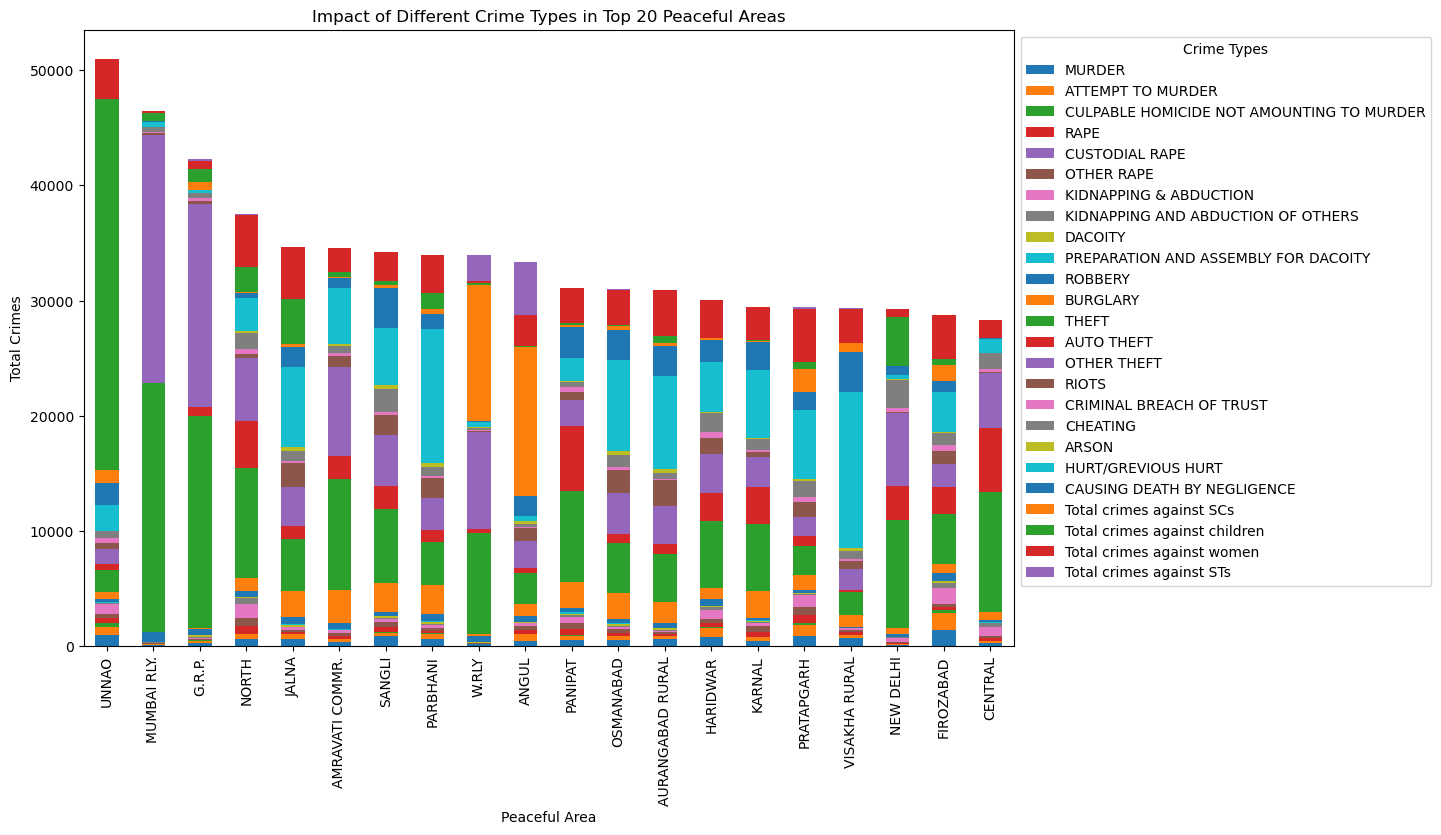

In [109]:
import matplotlib.pyplot as plt
crime_types = ['MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE', 'OTHER RAPE',
               'KIDNAPPING & ABDUCTION', 'KIDNAPPING AND ABDUCTION OF OTHERS',
               'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT', 'AUTO THEFT', 'OTHER THEFT',
               'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING', 'ARSON', 'HURT/GREVIOUS HURT', 'CAUSING DEATH BY NEGLIGENCE',
               'Total crimes against SCs', 'Total crimes against children', 'Total crimes against women',
               'Total crimes against STs']
crime_impact = Peaceful_area.groupby('DISTRICT')[crime_types].sum()
crime_impact['Total'] = crime_impact.sum(axis=1)
top_20_districts = crime_impact.nlargest(20, 'Total')
top_20_districts[crime_types].plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Impact of Different Crime Types in Top 20 Peaceful Areas')
plt.xlabel('Peaceful Area')
plt.ylabel('Total Crimes')
plt.legend(title='Crime Types', bbox_to_anchor=(1, 1))
plt.show()


### <u>- Moderate Area

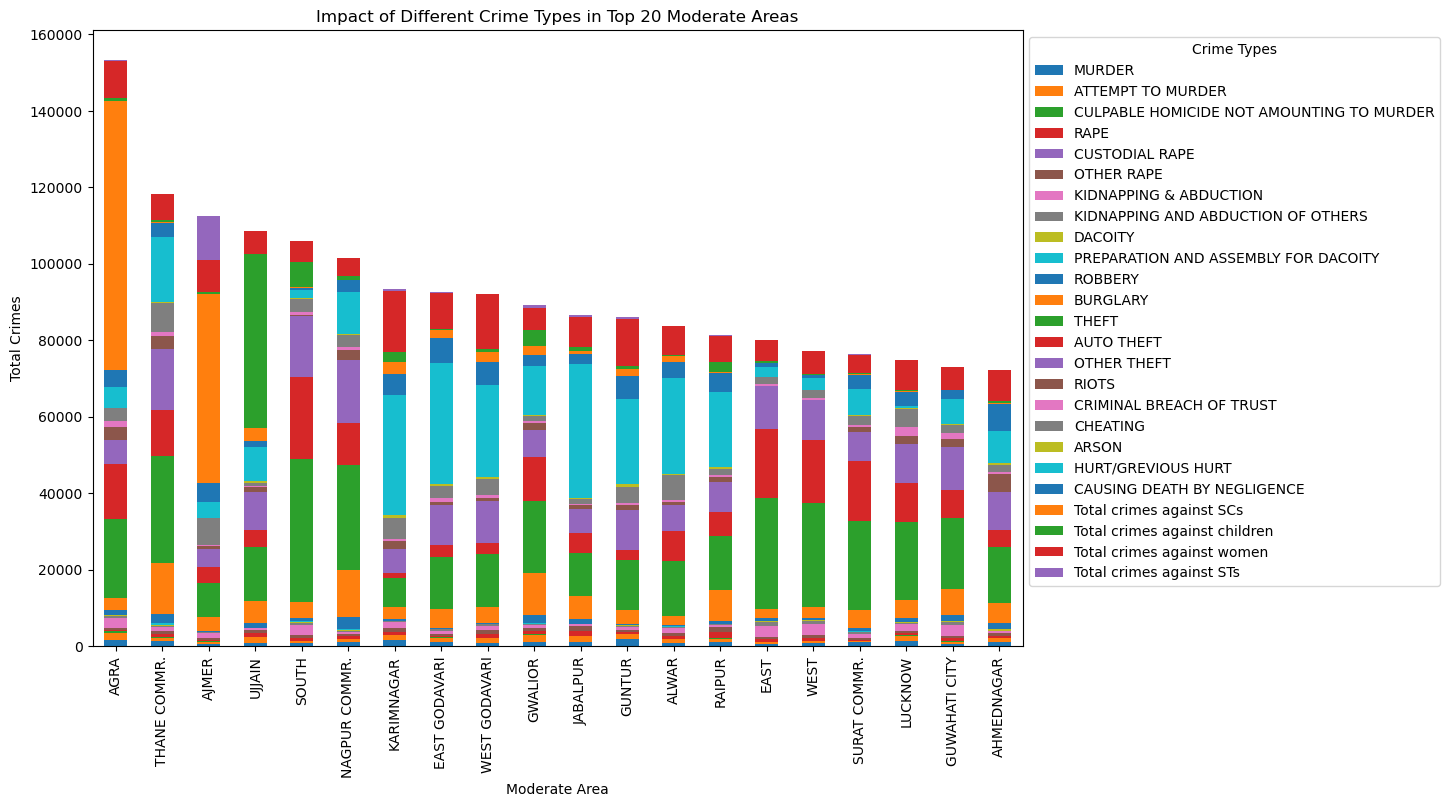

In [110]:
import matplotlib.pyplot as plt
crime_types = ['MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE', 'OTHER RAPE',
               'KIDNAPPING & ABDUCTION', 'KIDNAPPING AND ABDUCTION OF OTHERS',
               'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT', 'AUTO THEFT', 'OTHER THEFT',
               'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING', 'ARSON', 'HURT/GREVIOUS HURT', 'CAUSING DEATH BY NEGLIGENCE',
               'Total crimes against SCs', 'Total crimes against children', 'Total crimes against women',
               'Total crimes against STs']
crime_impact = Moderate_area.groupby('DISTRICT')[crime_types].sum()
crime_impact['Total'] = crime_impact.sum(axis=1)
top_20_districts = crime_impact.nlargest(20, 'Total')
top_20_districts[crime_types].plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Impact of Different Crime Types in Top 20 Moderate Areas')
plt.xlabel('Moderate Area')
plt.ylabel('Total Crimes')
plt.legend(title='Crime Types', bbox_to_anchor=(1, 1))
plt.show()


### <u>- Sensitive Area

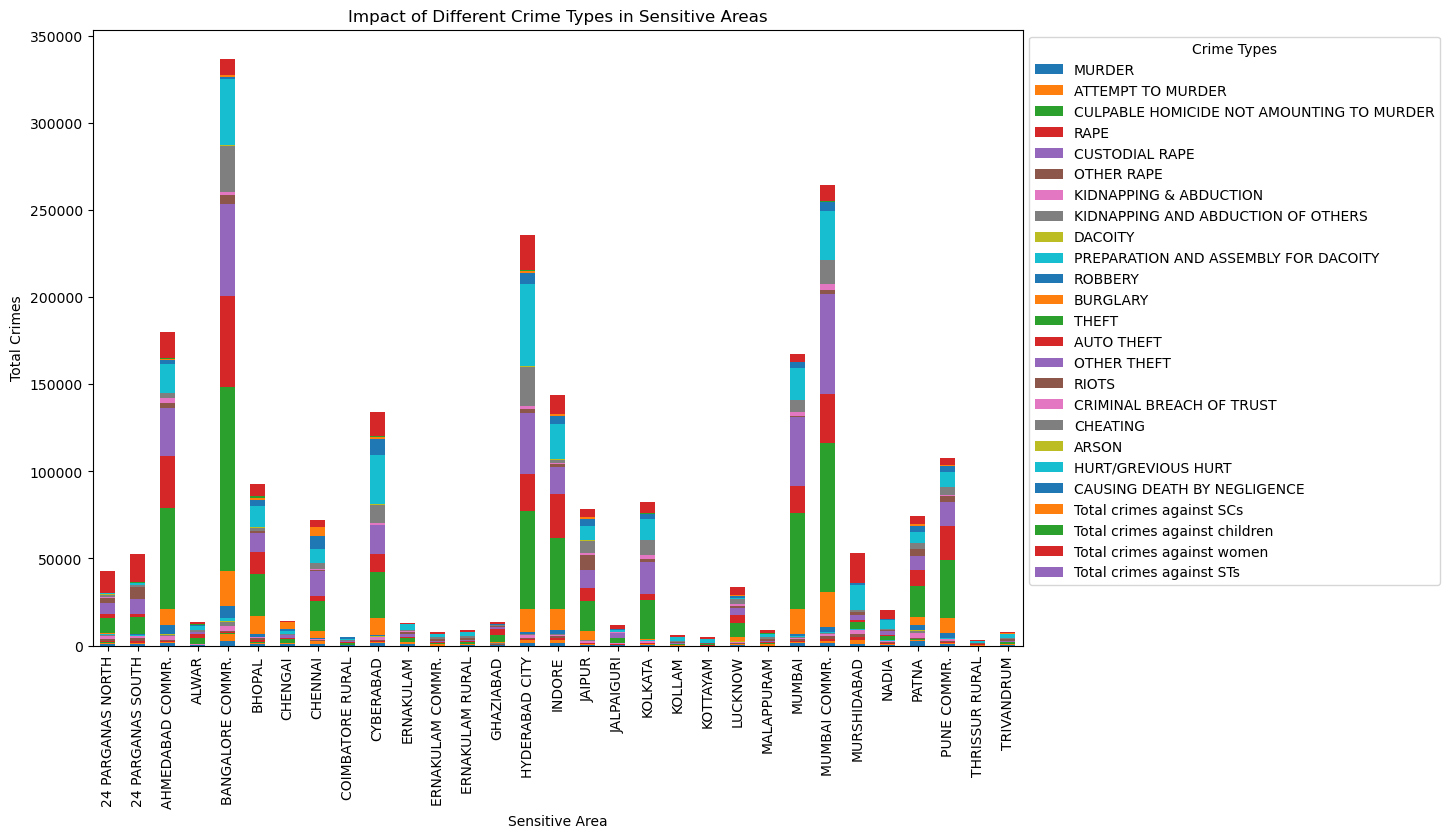

In [107]:
import matplotlib.pyplot as plt
crime_types = ['MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE', 'OTHER RAPE',
               'KIDNAPPING & ABDUCTION', 'KIDNAPPING AND ABDUCTION OF OTHERS',
               'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT', 'AUTO THEFT', 'OTHER THEFT',
               'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING', 'ARSON', 'HURT/GREVIOUS HURT', 'CAUSING DEATH BY NEGLIGENCE',
                'Total crimes against SCs', 'Total crimes against children', 'Total crimes against women',
               'Total crimes against STs']
crime_impact = Sensitive_area.groupby('DISTRICT')[crime_types].sum()
crime_impact.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Impact of Different Crime Types in Sensitive Areas')
plt.xlabel('Sensitive Area')
plt.ylabel('Total Crimes')
plt.legend(title='Crime Types', bbox_to_anchor=(1, 1))
plt.show()


## <u>Distribution of TOTAL IPC CRIMES, Total crimes against SCs,Total crimes against children,Total crimes against women, Total crimes against STs in States in our 3 clusters 

### <u>- Peaceful Area

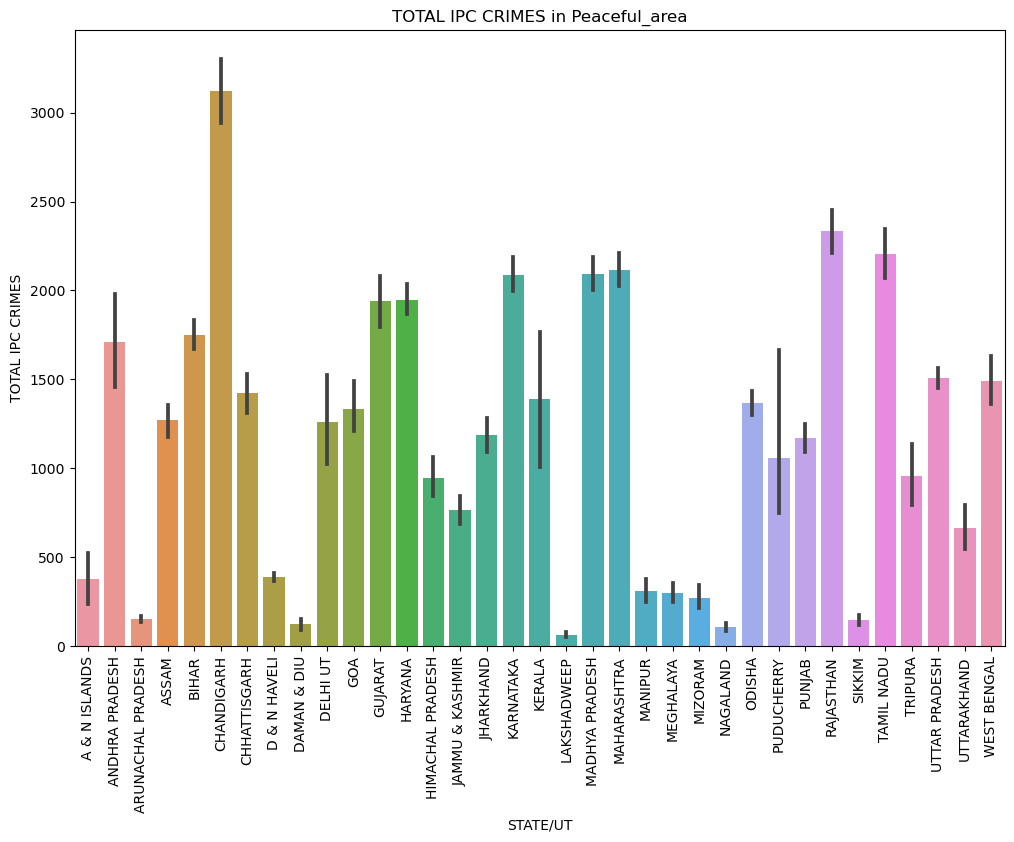

In [82]:
plt.figure(figsize=(12, 8))
sns.barplot(x='STATE/UT', y='TOTAL IPC CRIMES', data=Peaceful_area)
plt.xticks(rotation=90)
plt.title('TOTAL IPC CRIMES in Peaceful_area')
plt.show()


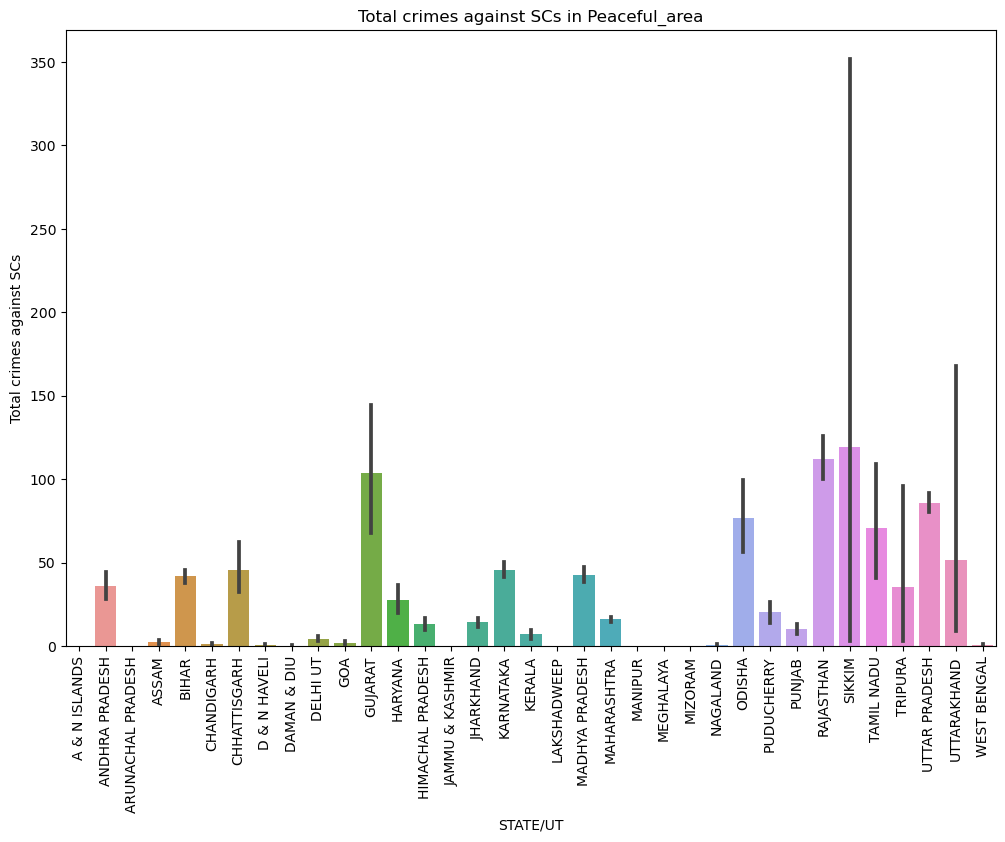

In [112]:
plt.figure(figsize=(12, 8))
sns.barplot(x='STATE/UT', y='Total crimes against SCs', data=Peaceful_area)
plt.xticks(rotation=90)
plt.title('Total crimes against SCs in Peaceful_area')
plt.show()


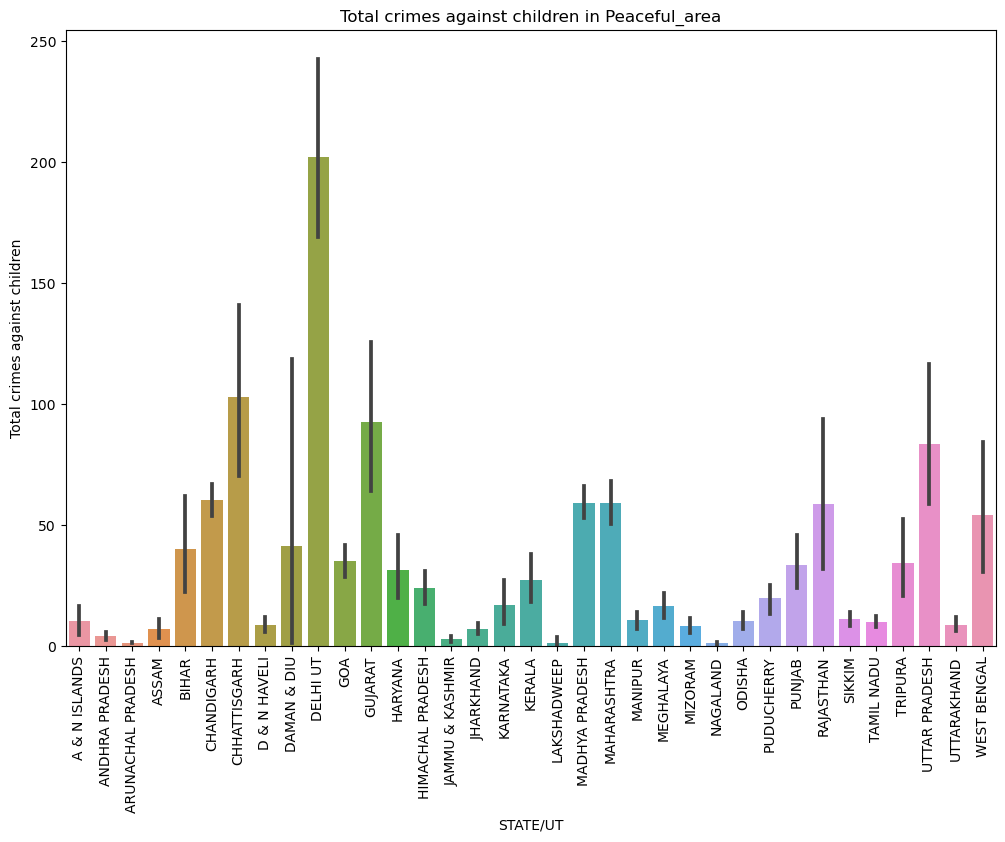

In [113]:
plt.figure(figsize=(12, 8))
sns.barplot(x='STATE/UT', y='Total crimes against children', data=Peaceful_area)
plt.xticks(rotation=90)
plt.title('Total crimes against children in Peaceful_area')
plt.show()


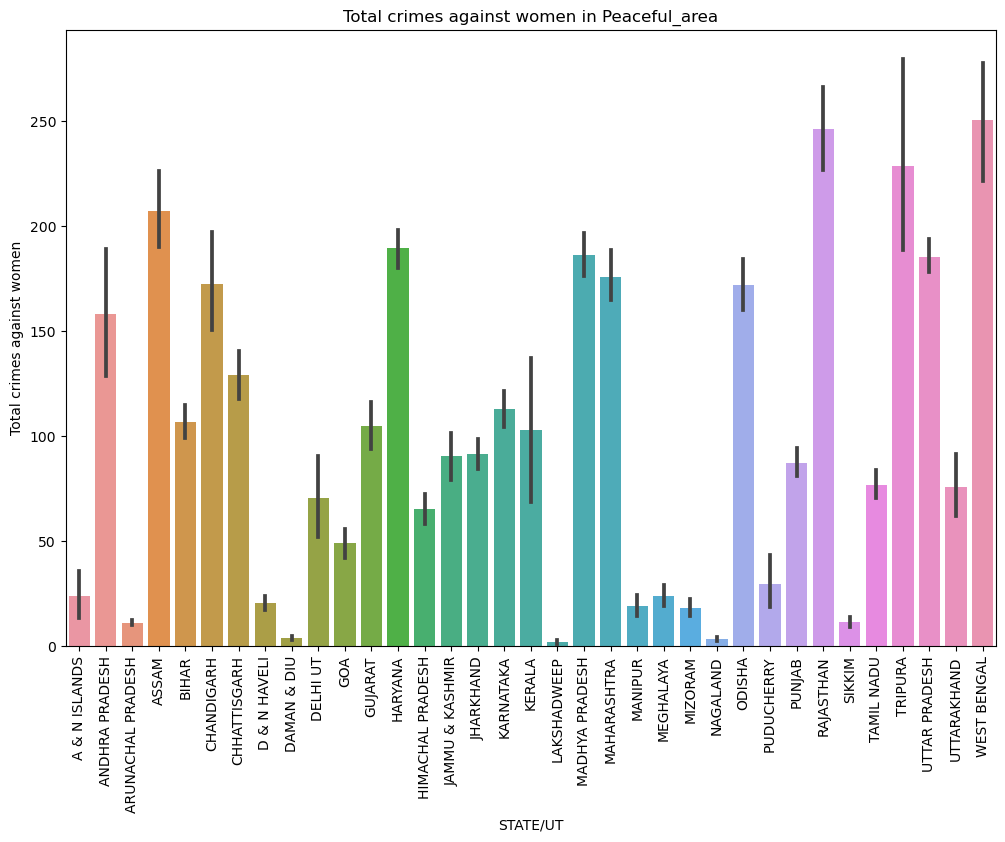

In [114]:
plt.figure(figsize=(12, 8))
sns.barplot(x='STATE/UT', y='Total crimes against women', data=Peaceful_area)
plt.xticks(rotation=90)
plt.title('Total crimes against women in Peaceful_area')
plt.show()


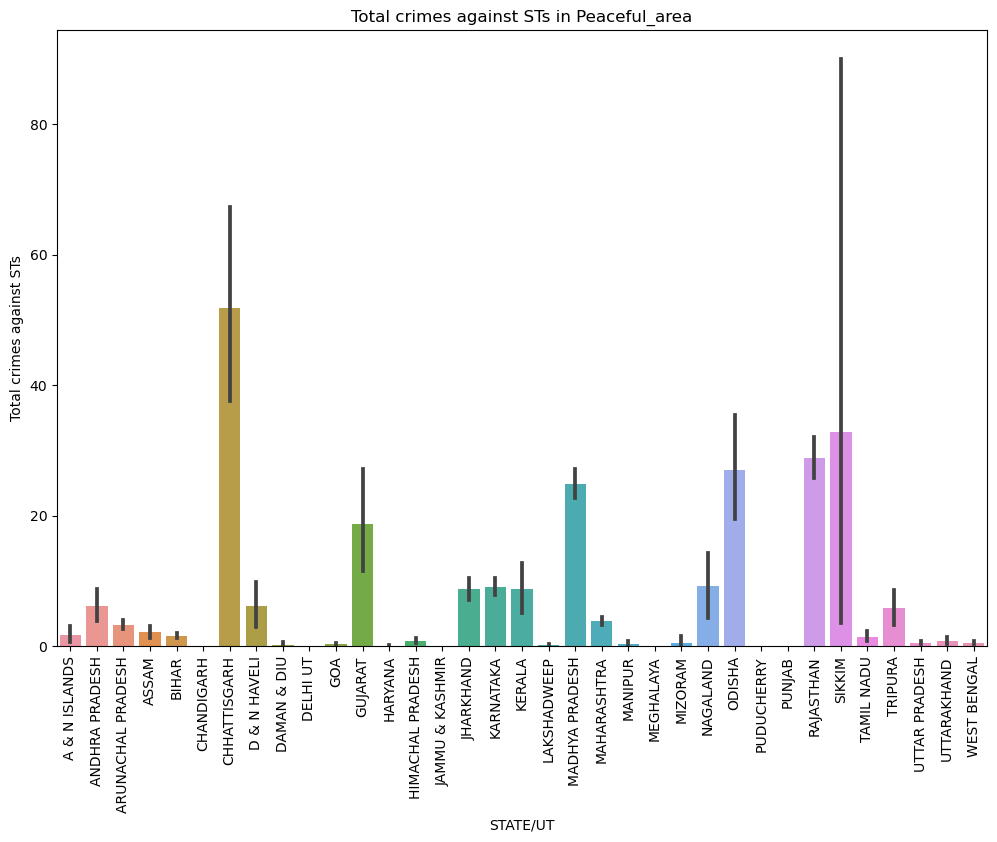

In [115]:
plt.figure(figsize=(12, 8))
sns.barplot(x='STATE/UT', y='Total crimes against STs', data=Peaceful_area)
plt.xticks(rotation=90)
plt.title('Total crimes against STs in Peaceful_area')
plt.show()


### <u>- Moderate Area

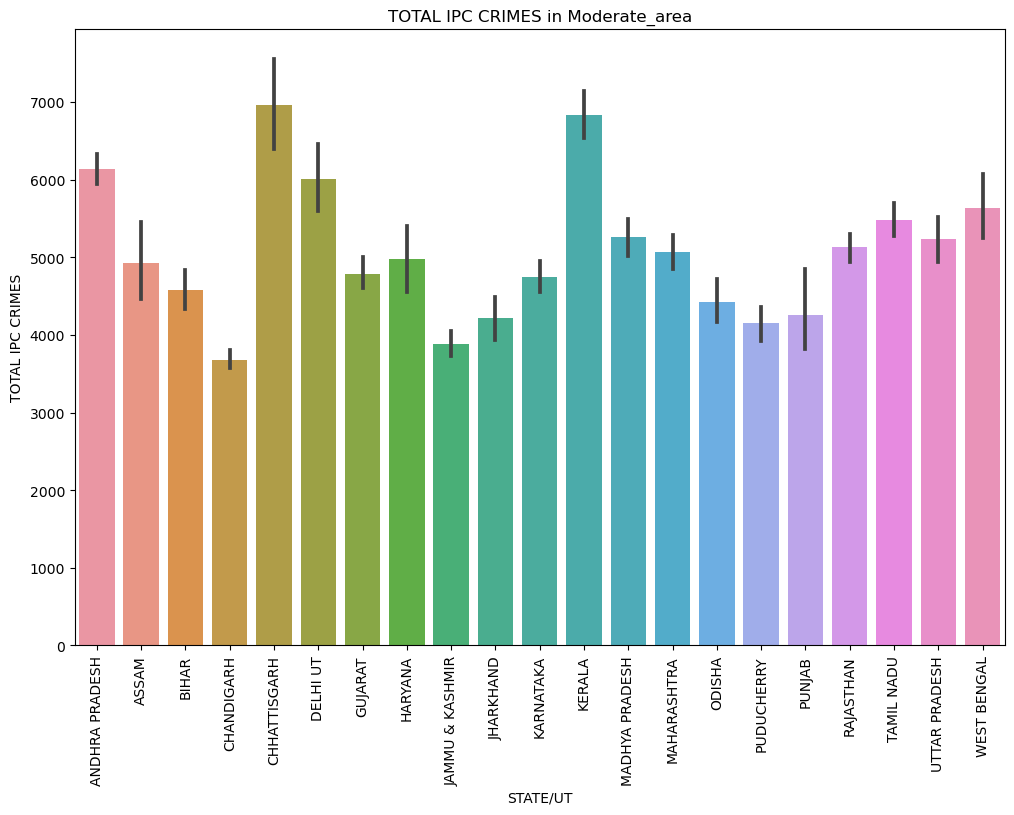

In [81]:
plt.figure(figsize=(12, 8))
sns.barplot(x='STATE/UT', y='TOTAL IPC CRIMES', data=Moderate_area)
plt.xticks(rotation=90)
plt.title('TOTAL IPC CRIMES in Moderate_area')
plt.show()


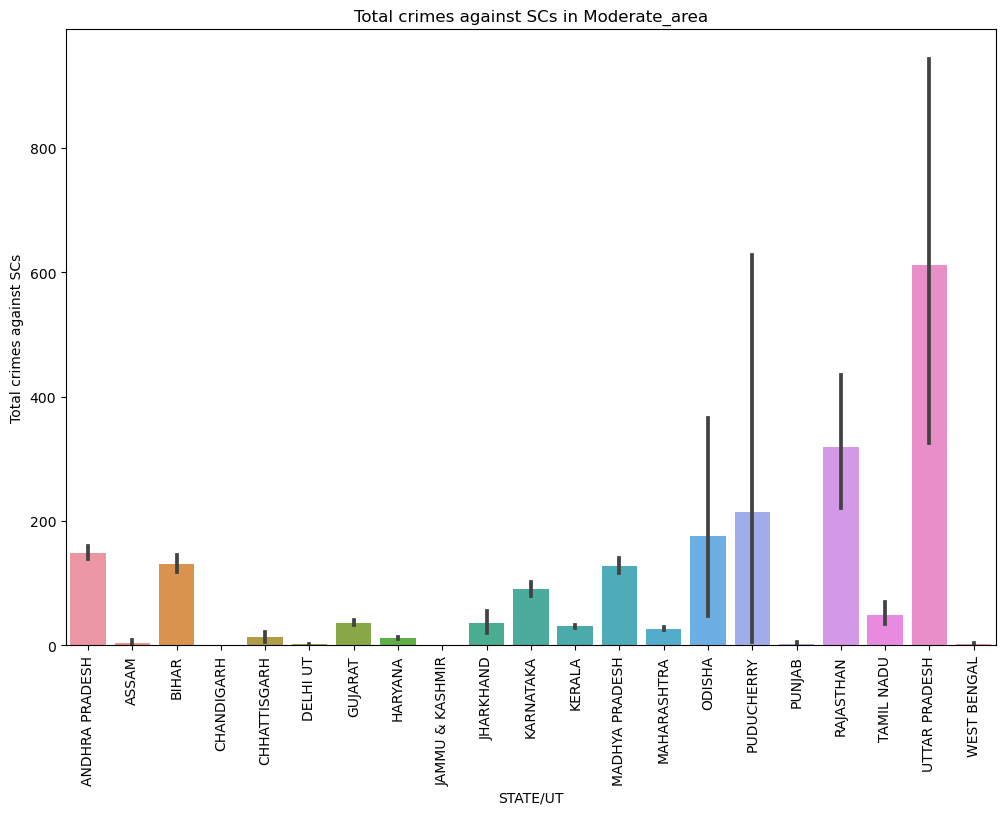

In [116]:
plt.figure(figsize=(12, 8))
sns.barplot(x='STATE/UT', y='Total crimes against SCs', data=Moderate_area)
plt.xticks(rotation=90)
plt.title('Total crimes against SCs in Moderate_area')
plt.show()

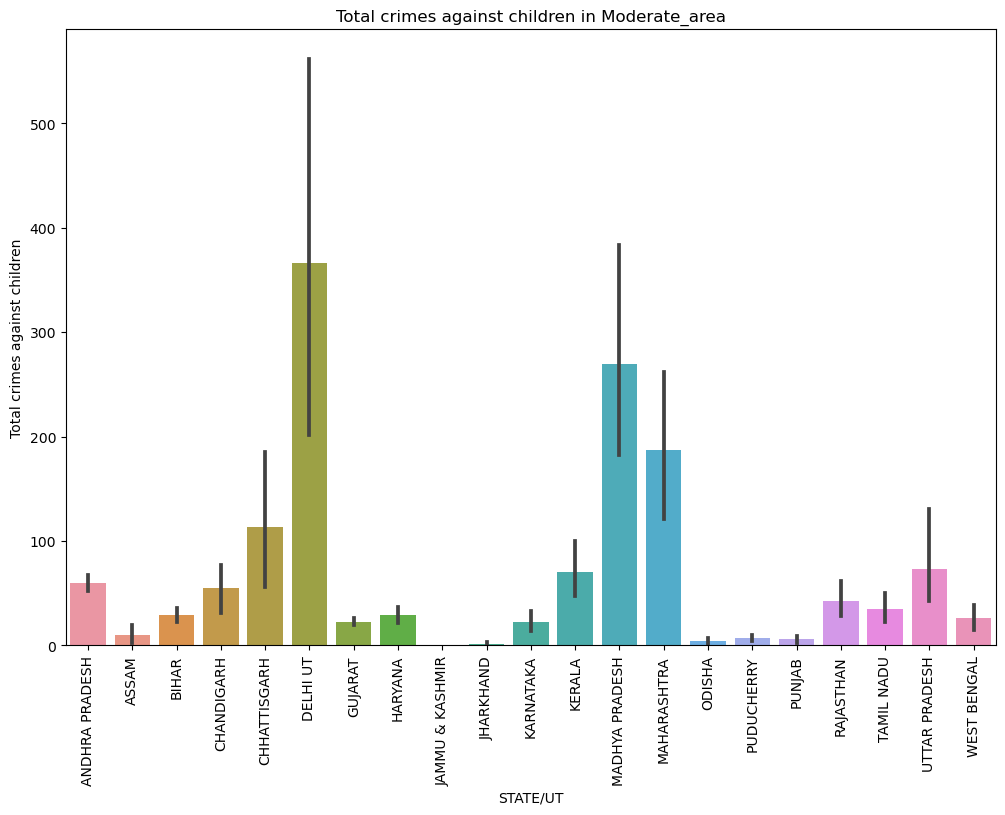

In [117]:
plt.figure(figsize=(12, 8))
sns.barplot(x='STATE/UT', y='Total crimes against children', data=Moderate_area)
plt.xticks(rotation=90)
plt.title('Total crimes against children in Moderate_area')
plt.show()

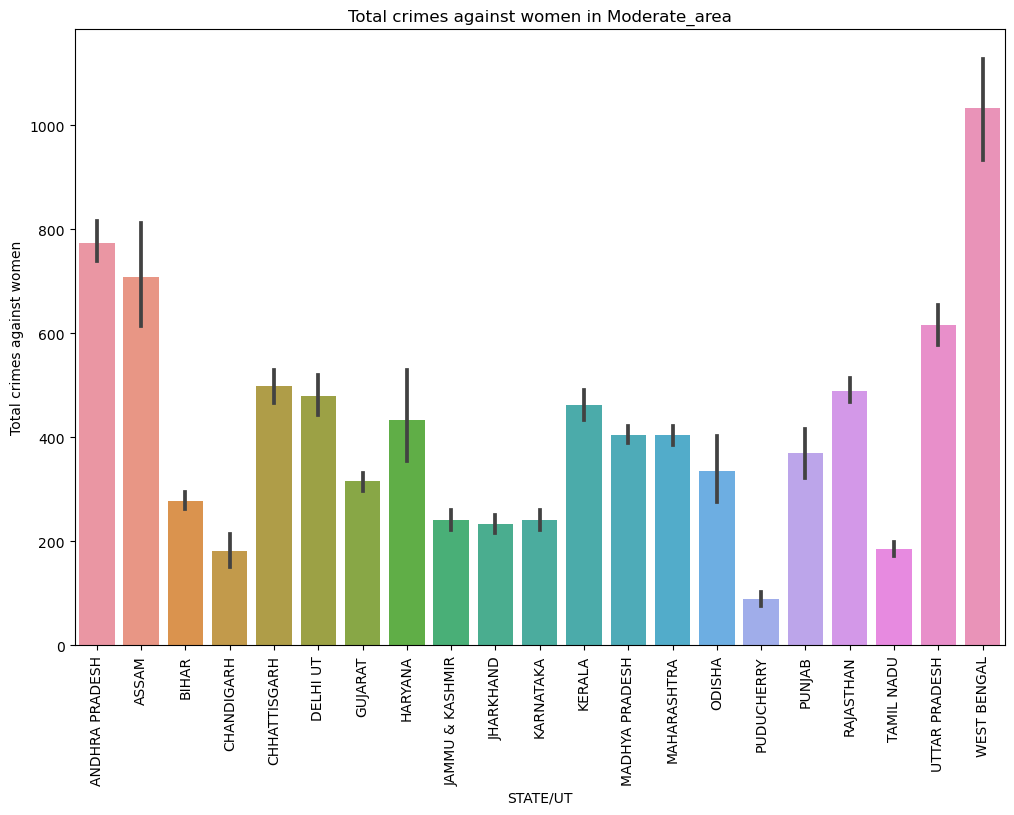

In [118]:
plt.figure(figsize=(12, 8))
sns.barplot(x='STATE/UT', y='Total crimes against women', data=Moderate_area)
plt.xticks(rotation=90)
plt.title('Total crimes against women in Moderate_area')
plt.show()

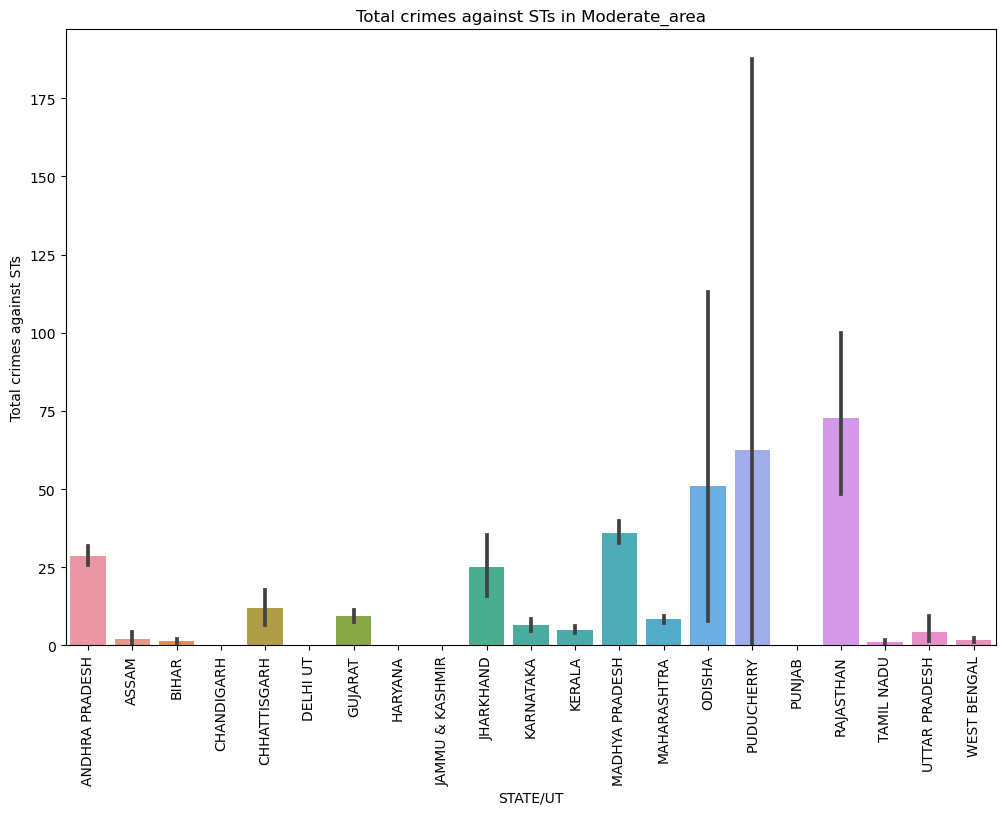

In [119]:
plt.figure(figsize=(12, 8))
sns.barplot(x='STATE/UT', y='Total crimes against STs', data=Moderate_area)
plt.xticks(rotation=90)
plt.title('Total crimes against STs in Moderate_area')
plt.show()

### <u>- Sensitive Area

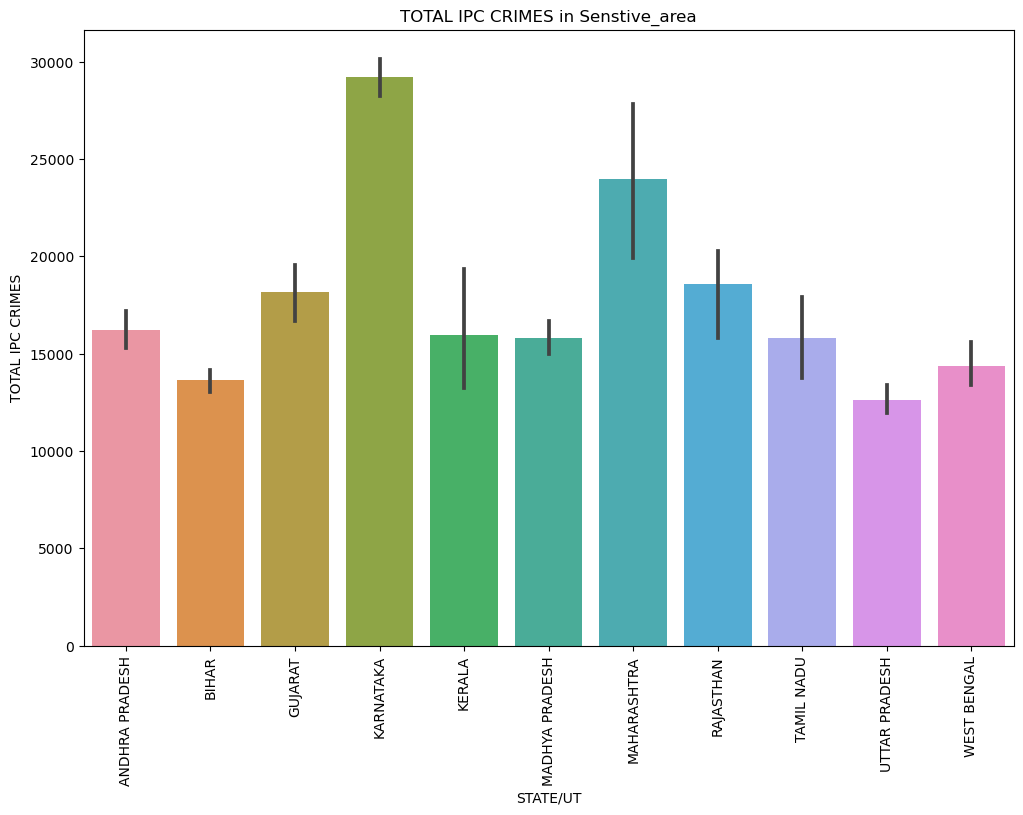

In [69]:
plt.figure(figsize=(12, 8))
sns.barplot(x='STATE/UT', y='TOTAL IPC CRIMES', data=Sensitive_area)
plt.xticks(rotation=90)
plt.title('TOTAL IPC CRIMES in Senstive_area')
plt.show()


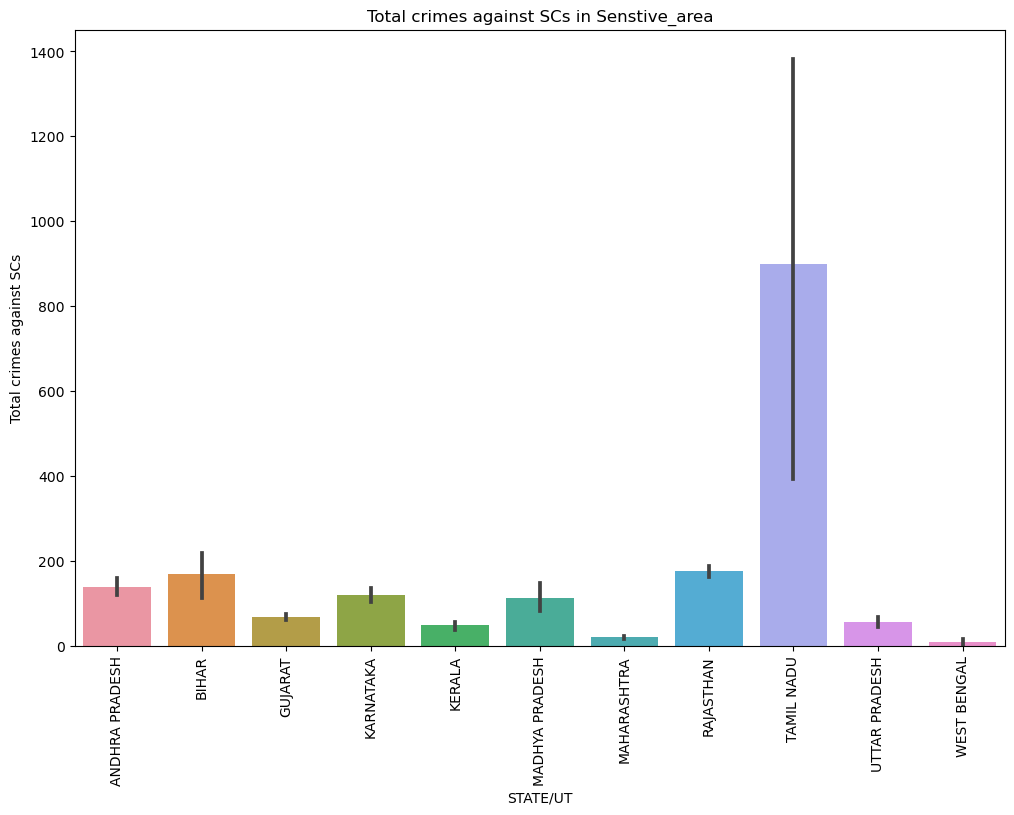

In [120]:
plt.figure(figsize=(12, 8))
sns.barplot(x='STATE/UT', y='Total crimes against SCs', data=Sensitive_area)
plt.xticks(rotation=90)
plt.title('Total crimes against SCs in Senstive_area')
plt.show()


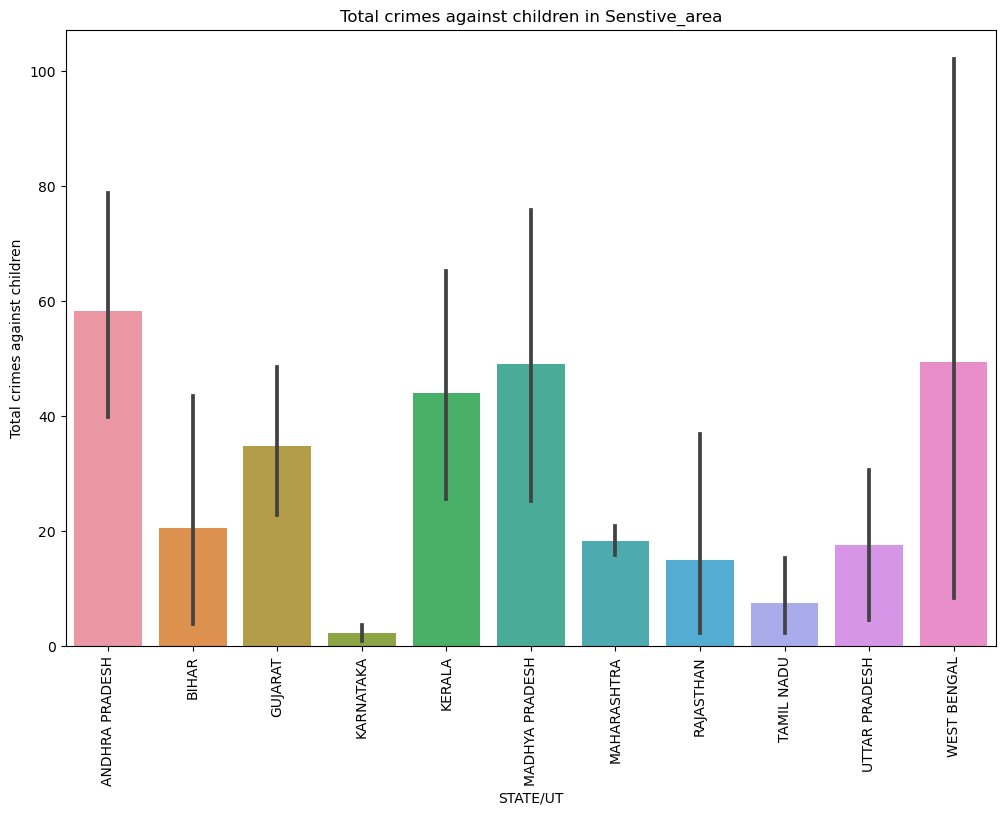

In [121]:
plt.figure(figsize=(12, 8))
sns.barplot(x='STATE/UT', y='Total crimes against children', data=Sensitive_area)
plt.xticks(rotation=90)
plt.title('Total crimes against children in Senstive_area')
plt.show()


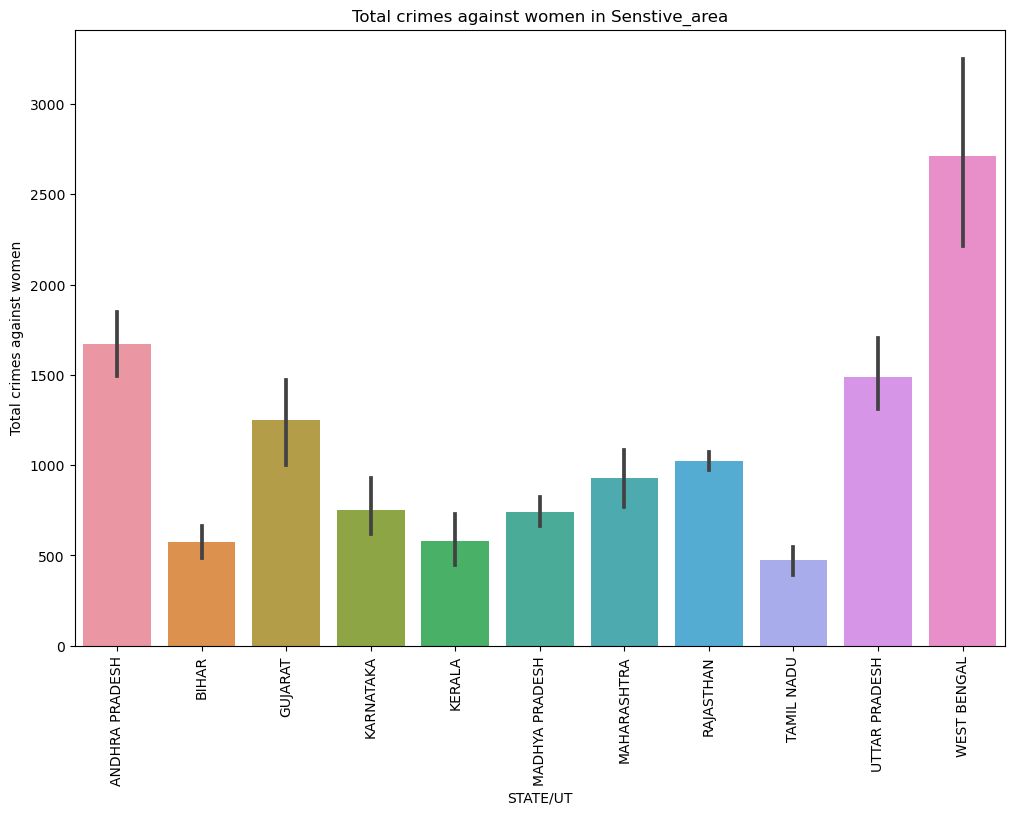

In [122]:
plt.figure(figsize=(12, 8))
sns.barplot(x='STATE/UT', y='Total crimes against women', data=Sensitive_area)
plt.xticks(rotation=90)
plt.title('Total crimes against women in Senstive_area')
plt.show()


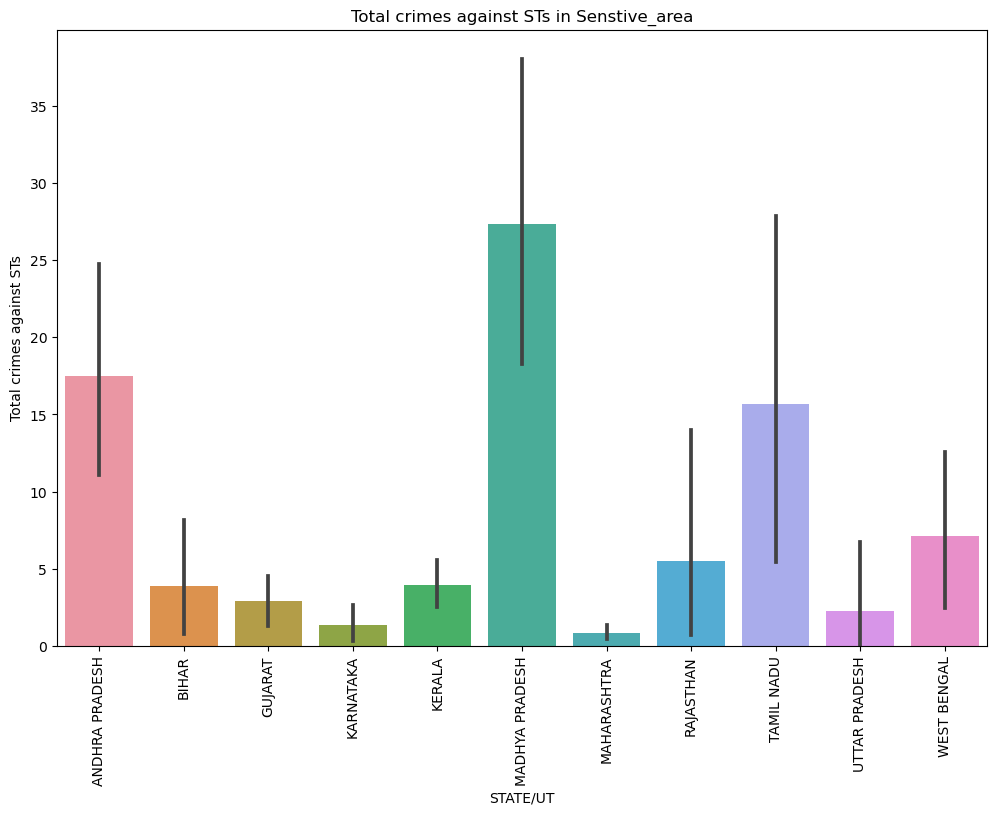

In [123]:
plt.figure(figsize=(12, 8))
sns.barplot(x='STATE/UT', y='Total crimes against STs', data=Sensitive_area)
plt.xticks(rotation=90)
plt.title('Total crimes against STs in Senstive_area')
plt.show()


## <u>Distribution of TOTAL IPC CRIMES, Total crimes against SCs,Total crimes against children,Total crimes against women, Total crimes against STs in States in overall dataset

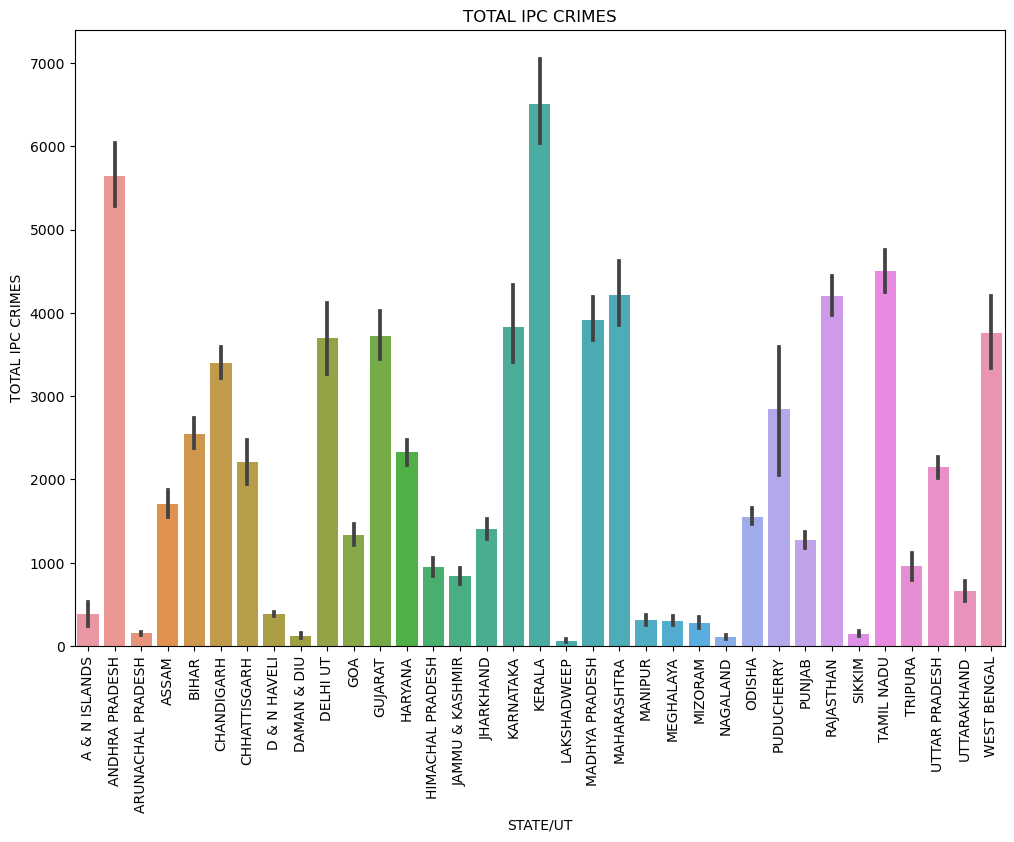

In [136]:
plt.figure(figsize=(12, 8))
sns.barplot(x='STATE/UT', y='TOTAL IPC CRIMES', data=df)
plt.xticks(rotation=90)
plt.title('TOTAL IPC CRIMES')
plt.show()


here we can see that ANDHRA PRADESH,KERALA has the highest crimes.

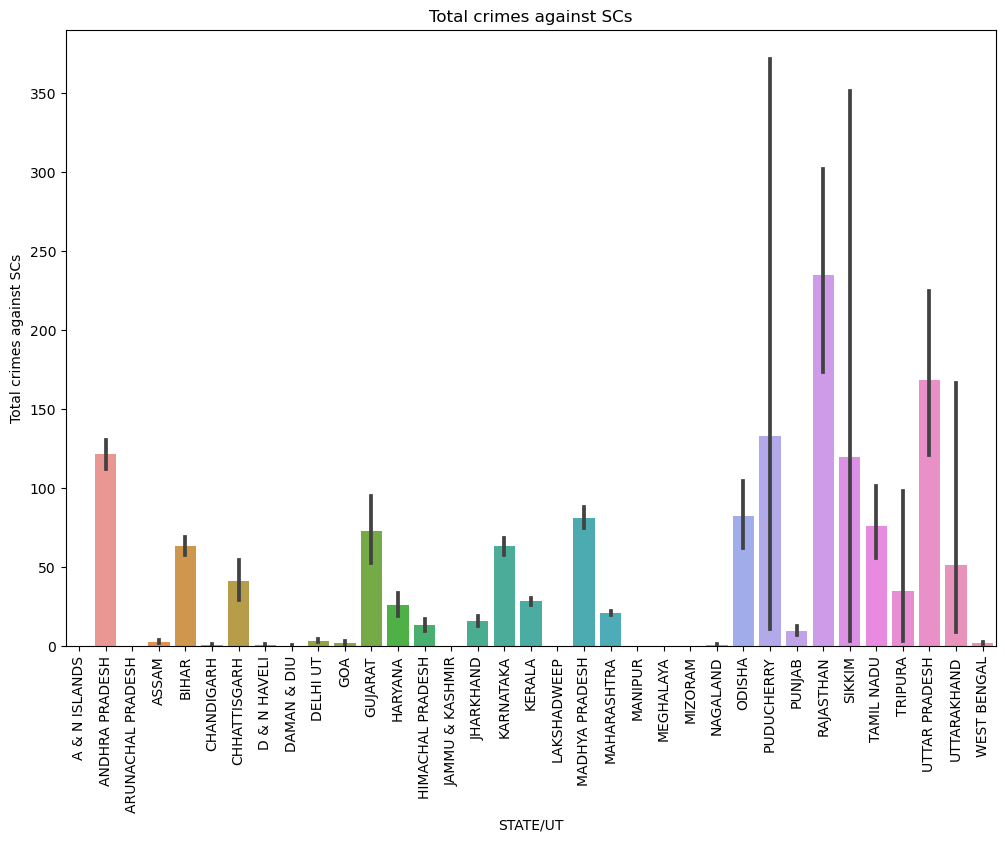

In [137]:
plt.figure(figsize=(12, 8))
sns.barplot(x='STATE/UT', y='Total crimes against SCs', data=df)
plt.xticks(rotation=90)
plt.title('Total crimes against SCs')
plt.show()


here we can see that RAJASTHAN, UTTAR PRADESH,PUDUCHERRY,ANDHRA PRADESH,SIKKIM has highest crimes against SCs.

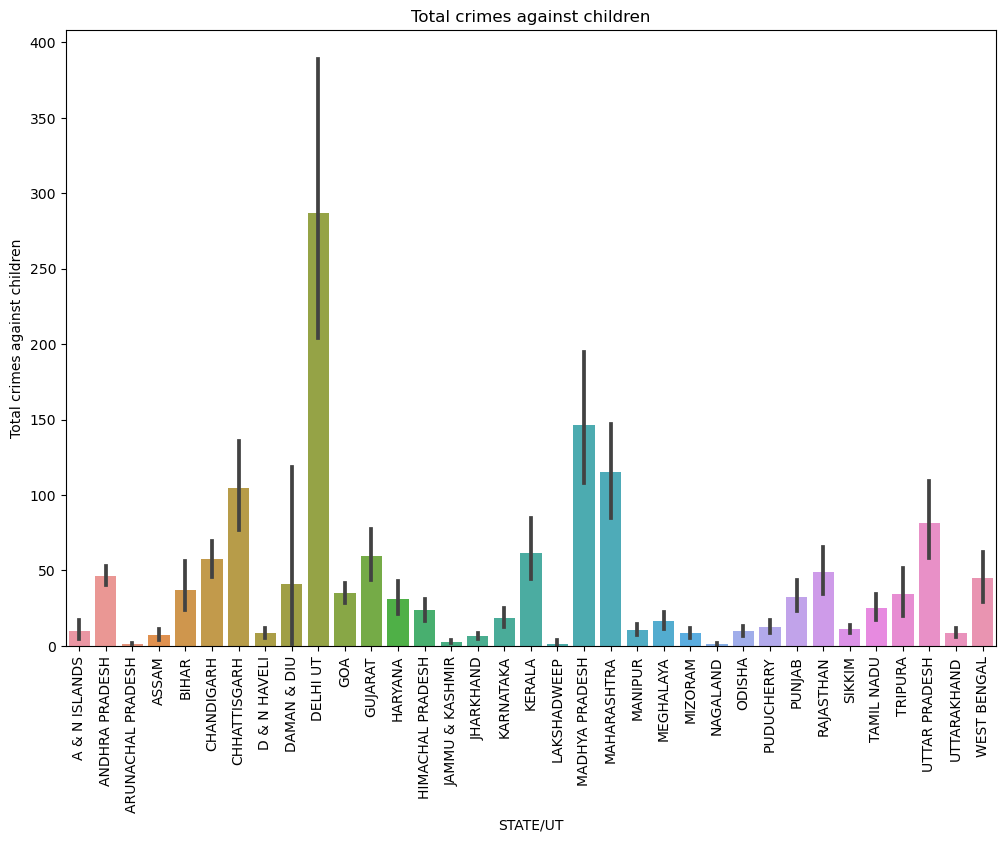

In [138]:
plt.figure(figsize=(12, 8))
sns.barplot(x='STATE/UT', y='Total crimes against children', data=df)
plt.xticks(rotation=90)
plt.title('Total crimes against children')
plt.show()


here we can see that Delhi,MadhyaPradesh,Maharastrta,Chhattisgarh has highest crimes against children 

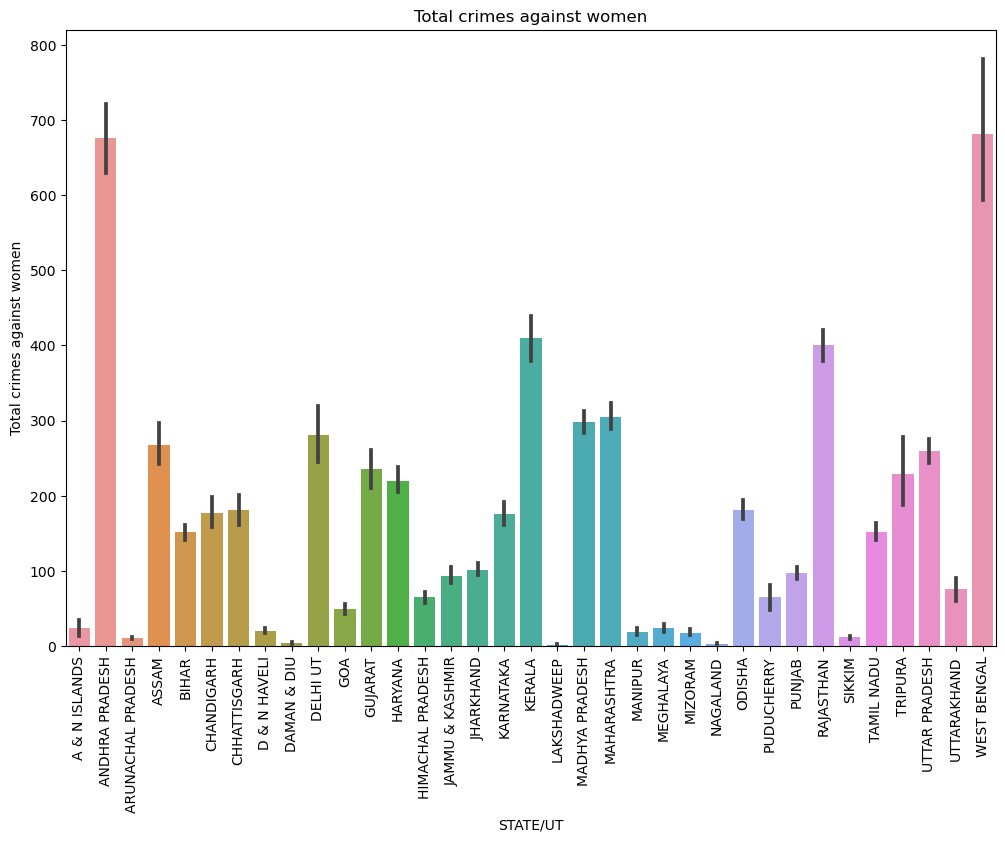

In [140]:
plt.figure(figsize=(12, 8))
sns.barplot(x='STATE/UT', y='Total crimes against women', data=df)
plt.xticks(rotation=90)
plt.title('Total crimes against women')
plt.show()


here we can see that Andhra Pradesh,West Bengal,Kerala,Rajasthan has highest crimes against women 

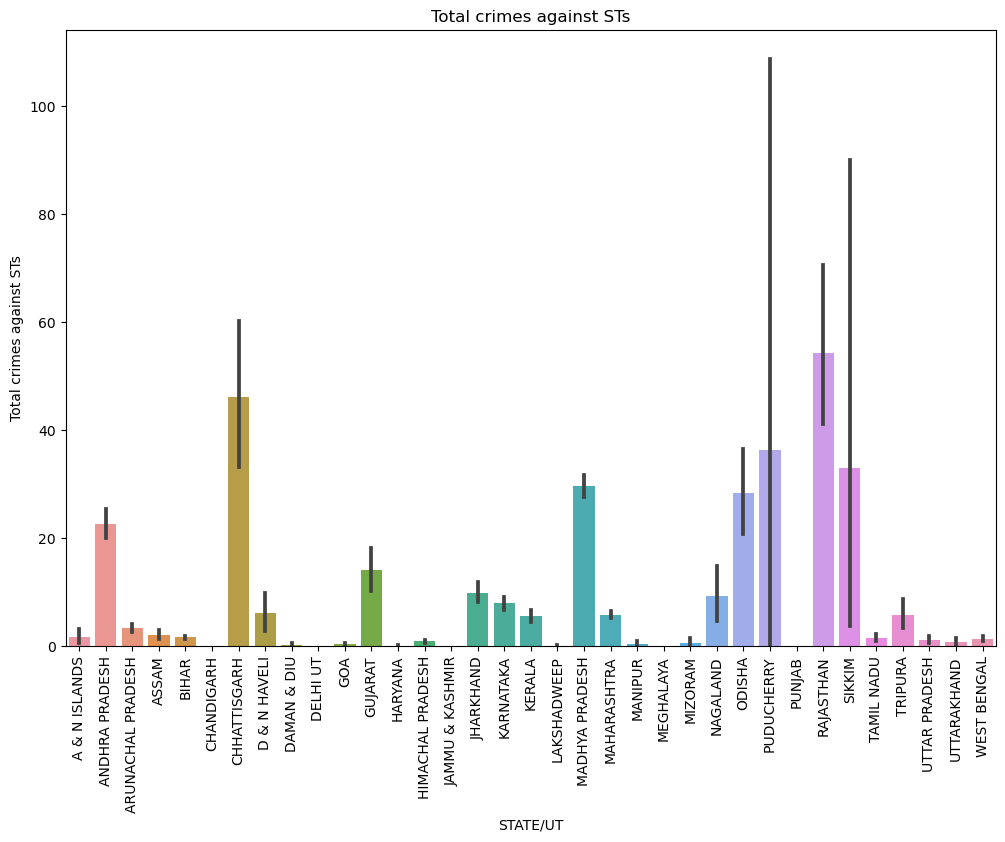

In [141]:
plt.figure(figsize=(12, 8))
sns.barplot(x='STATE/UT', y='Total crimes against STs', data=df)
plt.xticks(rotation=90)
plt.title('Total crimes against STs')
plt.show()

here we can see that Rajasthan,Chhattisgarh,Puducherry,Sikkim,Odisha,Madhya Pradesh has highest crimes against STs 

### 4.4   Capstone project overall story in your own words. Min 1000 words.

it is in the pdf in the the folder

<h1 align="center"><span style="color: #00FF00;"><u>PHASE IV COMPLETED</u></span></h1>
